<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TD4---Classification-et-conception-de-modèles-prévisionnels-de-la-criminalité-aux-USA" data-toc-modified-id="TD4---Classification-et-conception-de-modèles-prévisionnels-de-la-criminalité-aux-USA-1">TD4 - Classification et conception de modèles prévisionnels de la criminalité aux USA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Résumé" data-toc-modified-id="Résumé-1.0.0.1">Résumé</a></span></li><li><span><a href="#Avant-propos" data-toc-modified-id="Avant-propos-1.0.0.2">Avant-propos</a></span></li><li><span><a href="#Source" data-toc-modified-id="Source-1.0.0.3">Source</a></span></li></ul></li></ul></li><li><span><a href="#Nettoyage" data-toc-modified-id="Nettoyage-1.1">Nettoyage</a></span></li><li><span><a href="#Intégration" data-toc-modified-id="Intégration-1.2">Intégration</a></span></li><li><span><a href="#Réduction" data-toc-modified-id="Réduction-1.3">Réduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Etape-1-:-Apprentissage-d'une-distance-optimisée-entre-les-états-sur-des-données-fixes" data-toc-modified-id="Etape-1-:-Apprentissage-d'une-distance-optimisée-entre-les-états-sur-des-données-fixes-1.3.0.1">Etape 1 : Apprentissage d'une distance optimisée entre les états sur des données fixes</a></span></li><li><span><a href="#Etape-2-:-application-de-la-distance-optimisée-à-l'ensemble-des-données-(avec-Year)" data-toc-modified-id="Etape-2-:-application-de-la-distance-optimisée-à-l'ensemble-des-données-(avec-Year)-1.3.0.2">Etape 2 : application de la distance optimisée à l'ensemble des données (avec <code>Year</code>)</a></span></li></ul></li></ul></li><li><span><a href="#Exploration-des-données" data-toc-modified-id="Exploration-des-données-1.4">Exploration des données</a></span><ul class="toc-item"><li><span><a href="#Etude-de-l'évolution-du-crime-au-niveau-national" data-toc-modified-id="Etude-de-l'évolution-du-crime-au-niveau-national-1.4.1">Etude de l'évolution du crime au niveau <em>national</em></a></span></li><li><span><a href="#Utilisation-de-grilles-de-traçage-(facets)" data-toc-modified-id="Utilisation-de-grilles-de-traçage-(facets)-1.4.2">Utilisation de grilles de traçage (<code>facets</code>)</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-1.4.3">Heatmap</a></span></li></ul></li><li><span><a href="#Classification-des-états" data-toc-modified-id="Classification-des-états-1.5">Classification des états</a></span><ul class="toc-item"><li><span><a href="#Exploitation-du-clustering" data-toc-modified-id="Exploitation-du-clustering-1.5.1">Exploitation du clustering</a></span></li></ul></li><li><span><a href="#Modélisation-prévisionnelle-de-la-criminalité" data-toc-modified-id="Modélisation-prévisionnelle-de-la-criminalité-1.6">Modélisation prévisionnelle de la criminalité</a></span><ul class="toc-item"><li><span><a href="#Modèle-simplifié" data-toc-modified-id="Modèle-simplifié-1.6.1">Modèle simplifié</a></span></li><li><span><a href="#Modèle-prévisionnel-amélioré" data-toc-modified-id="Modèle-prévisionnel-amélioré-1.6.2">Modèle prévisionnel amélioré</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.6.3">Conclusions</a></span></li></ul></li></ul></li></ul></div>

# TD4 - Classification et conception de modèles prévisionnels de la criminalité aux USA

#### Résumé
Le but de ce deuxième TD est d'**appliquer les techniques vues dans le CM3 et CM4** à une série de données réelles. Après une phase initiale de **nettoyage** et de **vérification des données**, nous explorerons très rapidement les différentes séries de données (mais vous êtes invités à chercher et réaliser des graphes illustrants des axes intéressants d'analyse). Ensuite, nous chercherons à **classifier les différentes séries de données** afin d'essayer de déterminer des profils typiques de criminalité (plutôt violente, non-violente, etc...). Enfin nous tenterons de trouver un **modèle prévisionne**l à même d'estimer l'**évolution de la criminalité** dans les années à venir. Nous utiliserons ce modèle pour tester la fameuse "[**Lead Crime Hypothesis**](https://en.wikipedia.org/wiki/Lead%E2%80%93crime_hypothesis)".

#### Avant-propos
Ce TD est avant tout l'occasion de tester les différentes méthodes vues en cours et **ne constitue pas une analyse fine de la criminalité américaine**. La criminalité est la cause d'une multitude de facteurs socio-économiques que ce TP n'a pas la prétention de modéliser.

Sans langue de bois, les différents résultats dérivés au cours de ce TP ne sont **pas recevables tels quels** et doivent sans aucun doute être nuancés. Ceci étant dit, ces données constituent un bon cas d'étude dans le cadre du Data Mining, et présente des difficultés typiques de la plupart des séries temporelles.

#### Source
Les données utilisées dans ce TP, réunies dans le fichier `CrimeStatebyState.csv`, ont été téléchargées depuis le site du projet [**Uniform Crime Reporting Statistics**](https://www.ucrdatatool.gov/Search/Crime/State/StatebyState.cfm) initié par le FBI. Elles mesurent le **nombre** et le **taux de criminalité** (selon plusieurs types de crime) **par état** et par année (**de 1960 à 2014**). Le fichier `CrimeStatebyState.csv` est une copie directe du fichier téléchargé, aucune modification n'a été apportée.

---

## Nettoyage

Comme à l'accoutumée avec des données issues de l'open data, le format des fichiers sources est difficilement lisible et interprétable tel quel. Un certain nombre de transformations est donc à prévoir afin de pouvoir lire ces données dans `pandas`.

Commençons déjà par ouvrir et lire les quelques premières lignes du fichier. Etant donné qu'il s'agit d'un fichier en anglais, vraisemblablement non accentué, la gestion de l'encodage n'est pas nécessaire. On laisse donc Python se débrouiller.

In [ ]:
#J'ai importé multiprocess ici car il existe une erreur  "stanfit4anon_model" 
# lors de l'entrainement avec Prophet pour certaines versions.
# Code à commenter si l'erreur ne subsite pas
import multiprocessing
multiprocessing.set_start_method("fork")

In [2]:
# Lecture du fichier source
with open('CrimeStatebyState.csv', mode='r') as f:
    for i in range(15):
        print(f.readline())

Uniform Crime Reporting Statistics - UCR Data Online

http://www.ucrdatatool.gov/



Estimated crime in Alabama



,,National or state crime,,,,,,,,,,"Crime rate per 100,000 population",,,,,,,,,,,



,,Violent crime,,,,,,Property crime,,,,Violent crime,,,,,,Property crime,,,,,



Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,

1960,   3266740,       6097,         406,         281,,         898,       4512,      33823,      11626,      19344,       2853,         186.6,          12.4,           8.6,,          27.5,         138.1,       1035.4,         355.9,         592.1,          87.3 

1961,   3302000,       5564,         427

Le formattage dans le notebook n'est pas idéal mais on peut déjà constater quelques points :
* Pas de problème visible de lecture dû au choix de l'encodage
* Les quelques premières lignes du fichier sont inutiles pour l'analyse
* Les données en elle-même sont **écrites état par état** (cf. la mention `Estimated crime in Alabama`), on devra **fusionner toutes ces séries ensemble** en rajoutant une colonne `etat`
* Bien que ce soit difficilement lisible dans le fichier CSV, les **en-têtes sont à 3 niveaux** :
    * Niveau 0 : Effectifs recensés, taux de prévalence (pour 100 000 hab, en fonction de la population de l'année courante)
    * Niveau 1 : Crimes et Délits concernant la propriété (vols, etc...)
    * Niveau 2 : En-tête les plus précis, définissant le nom des variables utilisées dans le tableau de donnée
    
Pour recréer cet en-tête hiérarchique dans `pandas` il suffirait de passer une liste de lignes à lire au paramètre `header` de `read_csv`. Au cours de l'analyse, nous utiliserons surtout le dernier niveau, donc nous ne lirons que celui-ci.

Enfin, les différentes catégories de crimes et délits recensés sont :
* `Violent crime total` : inclut tous les crimes avec violence, y compris ceux chiffrés ci-dessous
* `Murder and nonnegligent manslaughter` : meurtre et homicide volontaire (ne comprend pas les accidents de la route)
* `Legacy rape / Revised rape` : viol (effectifs comptabilisés pour les définitions historique et révisée)
* `Robbery` : Vol avec aggression (à main armée par exemple)
* `Aggravated Assault` : Agression caractérisée, avec intention d'infliger des blessures
* `Property crime total` : inclus tous les crimes relatifs à la propriété, y compris ceux chiffrés ci-dessous
* `Burglary` : cambriolage (effraction de la propriété)
* `Larceny-theft` : vols en tout genre, non violents
* `Motor vehicle theft` : vols de véhicules en tout genre (sauf avions, trains et matériels agricoles)

----

Afin de pouvoir extraire une série de données par état, il est nécessaire d'isoler chaque bloc de données. On remarque que tous ces blocs commencent par `Estimated crime in `, on va donc séparer les données brutes selon ce texte.

In [3]:
# On commence par lire tout le fichier dans une seule chaîne de caractères
with open('CrimeStatebyState.csv', mode='r') as f:
    raw_data = f.read()

len(raw_data)

783895

In [4]:
# Séparation et isolation des blocs de données
# Le premier élément isolé est le blabla au début qui ne contient pas de données, on l'ignore donc
data_blocks = raw_data.split('Estimated crime in ')[1:]
len(data_blocks)

51

Les données sont enregistrées pour les 50 états des USA ainsi que le district fédéral de Columbia où se trouve la capitale Washington, soit 51 blocs de données.

In [5]:
data_blocks[15]

'Iowa\n\n,,National or state crime,,,,,,,,,,"Crime rate per 100,000 population",,,,,,,,,,,\n\n,,Violent crime,,,,,,Property crime,,,,Violent crime,,,,,,Property crime,,,,,\n\nYear,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,\n1960,   2757537,         656,          17,         102,,         301,         236,      30335,       6375,      21865,       2095,          23.8,            .6,           3.7,,          10.9,           8.6,       1100.1,         231.2,         792.9,          76.0 \n1961,   2779000,         643,          36,          81,,         291,         235,      29392,       6356,      21096,       1940,          23.1

Pour chaque bloc de donnée, la première ligne est constitué du nom de l'état, suivi des caractères `\n\n` (deux sauts de lignes). En cherchant dans la documentation Python pour les [méthodes sur les string](https://docs.python.org/3/library/stdtypes.html#str.partition), nous trouvons une fonction `partition` qui accepte en entrée une chaîne de caractère et un séparateur, et en sortie un tuple contenant :
* la portion de texte à gauche de la **première** occurence du séparateur
* le séparateur lui-même
* puis la portion restante de texte à droite du séparateur.

En partitionnant sur le séparateur `\n\n`, nous devrions donc trouver d'une part le nom de chaque état, d'autre part le bloc de données en lui-même.

In [6]:
# un petit essai pour vérifier le fonctionnement de la fonction
'test avec plusieurs mot'.partition('avec')

('test ', 'avec', ' plusieurs mot')

In [7]:
data_dict = dict()

for block in data_blocks:
    # le nom de variable '_' est souvent utilisé pour les variables à ignorer
    state, _ , data = block.partition('\n\n')
    print(state)
    
    data_dict[state] = data

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [8]:
data_dict['California']

',,National or state crime,,,,,,,,,,"Crime rate per 100,000 population",,,,,,,,,,,\n\n,,Violent crime,,,,,,Property crime,,,,Violent crime,,,,,,Property crime,,,,,\n\nYear,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,Motor vehicle theft,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,\n1960,  15717204,      37558,         616,       2859,,      15287,      18796,     508511,     143102,     311956,      53453,         239.0,           3.9,          18.2,,          97.3,         119.6,       3235.4,         910.5,       1984.8,         340.1 \n1961,  16397000,      38154,         605,       3033,,      14832,      19684,     521008,     146615,     319834,      54559,         232.7,           3.7, 

On peut désormais lire chacune de ces séries de données dans un DataFrame avant de concaténer ces 51 DataFrame dans un unique DataFrame.

**Petite remarque technique** : la fonction `read_csv` accepte en entrée une chaîne de caractères représentant un nom de fichier ou un objet se comportant comme un fichier ouvert (par exemple avec la fonction `open` vue ci-dessus). Les données sont dans notre cas uniquement en mémoire, nous avons donc deux choix :
* Ecrire chaque série (une par état) dans un fichier (temporaire ou non) puis lire chaque fichier avec `pandas`
* Créer un objet **en mémoire** se comportant comme un fichier et le lire avec `pandas`

On choisit la deuxième option pour éviter de polluer le dossier avec 51 fichiers supplémentaires. La cellule suivante effectue la création (avec la classe `StringIO`) puis la lecture et la transformation des données. La création de variables se comportant comme des fichiers en Python n'est pas fondamentalement nécessaire à retenir, elle constitue juste un raccourci pratique ici.

In [9]:
from io import StringIO
import pandas as pd

df_list = list()

for state, data in data_dict.items():
    buffer = StringIO(data) # création d'un objet se comportant comme un fichier mais uniquement en mémoire
    df = pd.read_csv(buffer,
                     header=2, # on ne conserve que le dernier niveau pour les en-têtes
                     index_col='Year') 
    
    df['state'] = state # Ajout d'une variable qualitative "state" pour dissocier les séries après concaténation
    df_list.append(df)
    
df_list[0].head()

,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,...,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unnamed: 22,state
Year,,,,,,,,,,,,,,,,,,,,,
1960,3266740,6097,406,281,NaN,898,4512,33823,11626,19344,...,8.6,NaN,27.5,138.1,1035.4,355.9,592.1,87.3,NaN,Alabama
1961,3302000,5564,427,252,NaN,630,4255,32541,11205,18801,...,7.6,NaN,19.1,128.9,985.5,339.3,569.4,76.8,NaN,Alabama
1962,3358000,5283,316,218,NaN,754,3995,35829,11722,21306,...,6.5,NaN,22.5,119.0,1067.0,349.1,634.5,83.4,NaN,Alabama
1963,3347000,6115,340,192,NaN,828,4755,38521,12614,22874,...,5.7,NaN,24.7,142.1,1150.9,376.9,683.4,90.6,NaN,Alabama
1964,3407000,7260,316,397,NaN,992,5555,46290,15898,26713,...,11.7,NaN,29.1,163.0,1358.7,466.6,784.1,108.0,NaN,Alabama


Plutôt que de traiter chaque DataFrame indépendamment, on se propose de commencer par les concaténer avant de terminer le reste du nettoyage.

In [10]:
# Concaténation des DataFrame (concaténation verticale par défaut)
df = pd.concat(df_list)

print(df.state.unique())
print(len(df), 'lignes au total')
df.head()

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
2866 lignes au total


,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,Larceny-theft,...,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unnamed: 22,state
Year,,,,,,,,,,,,,,,,,,,,,
1960,3266740,6097,406.0,281.0,NaN,898.0,4512.0,33823.0,11626.0,19344.0,...,8.6,NaN,27.5,138.1,1035.4,355.9,592.1,87.3,NaN,Alabama
1961,3302000,5564,427.0,252.0,NaN,630.0,4255.0,32541.0,11205.0,18801.0,...,7.6,NaN,19.1,128.9,985.5,339.3,569.4,76.8,NaN,Alabama
1962,3358000,5283,316.0,218.0,NaN,754.0,3995.0,35829.0,11722.0,21306.0,...,6.5,NaN,22.5,119.0,1067.0,349.1,634.5,83.4,NaN,Alabama
1963,3347000,6115,340.0,192.0,NaN,828.0,4755.0,38521.0,12614.0,22874.0,...,5.7,NaN,24.7,142.1,1150.9,376.9,683.4,90.6,NaN,Alabama
1964,3407000,7260,316.0,397.0,NaN,992.0,5555.0,46290.0,15898.0,26713.0,...,11.7,NaN,29.1,163.0,1358.7,466.6,784.1,108.0,NaN,Alabama


Le plus dur est fait, on termine maintenant les quelques traitements nécessaires pour assurer la qualité des données
* Eliminer les effectifs totaux absolus et **ne garder que les taux (*rates*)** plus facilement comparables entre les années et les états
* Passage de l'index à un index temporel, de 1960 à 2014
* Conversion de la colonne `state` vers un type qualitatif (`category`)
* Renommer toutes les colonnes avec des noms courts et explicites
* Fusionner intelligemment les séries `Legacy rape` et `Revised rape` en une unique série `Rape`. En regardant les [définitions](https://www.ucrdatatool.gov/offenses.cfm) en détail, nous découvrons que `Revised Rape` est une définition plus généraliste que `Legacy Rape` (et donc le taux de `Revised Rape` est toujours supérieur ou égal au taux de `Legacy Rape`). Aussi, pour les années où l'information `Revised Rape` est disponible, nous retiendrons ce chiffre, sinon nous retiendrons `Legacy Rape` (toujours disponible).
* Supprimer la colonne ne contenant que des NaN
* Vérifier la présence de NaN restants

##### Sélection des colonnes intéressantes, élimination des effectifs absolus

In [11]:
# On sélectionne les colonnes contenant le mot "rate", ainsi que les colonnes "Population" et "state"
selected_columns = df.columns[df.columns.str.contains('rate') | (df.columns == 'Population') | (df.columns == 'state')]
selected_columns

Index(['Population', 'Violent Crime rate',
       'Murder and nonnegligent manslaughter rate', 'Legacy rape rate /1',
       'Revised rape rate /2', 'Robbery rate', 'Aggravated assault rate',
       'Property crime rate', 'Burglary rate', 'Larceny-theft rate',
       'Motor vehicle theft rate', 'state'],
      dtype='object')

In [12]:
df = df[selected_columns]
df.head()

,Population,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,state
Year,,,,,,,,,,,,
1960,3266740,186.6,12.4,8.6,NaN,27.5,138.1,1035.4,355.9,592.1,87.3,Alabama
1961,3302000,168.5,12.9,7.6,NaN,19.1,128.9,985.5,339.3,569.4,76.8,Alabama
1962,3358000,157.3,9.4,6.5,NaN,22.5,119.0,1067.0,349.1,634.5,83.4,Alabama
1963,3347000,182.7,10.2,5.7,NaN,24.7,142.1,1150.9,376.9,683.4,90.6,Alabama
1964,3407000,213.1,9.3,11.7,NaN,29.1,163.0,1358.7,466.6,784.1,108.0,Alabama


###### Renommage des colonnes

In [13]:
df = df.rename(columns={
    'Population': 'population',
    'Violent Crime rate': 'violent_crime_total',
    'Murder and nonnegligent manslaughter rate': 'murder',
    'Legacy rape rate /1': 'legacy_rape',
    'Revised rape rate /2': 'revised_rape',
    'Robbery rate': 'robbery',
    'Aggravated assault rate': 'assault',
    'Property crime rate': 'property_crime_total',
    'Burglary rate': 'burglary',
    'Larceny-theft rate': 'theft',
    'Motor vehicle theft rate': 'car_theft'
})

df.head()

,population,violent_crime_total,murder,legacy_rape,revised_rape,robbery,assault,property_crime_total,burglary,theft,car_theft,state
Year,,,,,,,,,,,,
1960,3266740,186.6,12.4,8.6,NaN,27.5,138.1,1035.4,355.9,592.1,87.3,Alabama
1961,3302000,168.5,12.9,7.6,NaN,19.1,128.9,985.5,339.3,569.4,76.8,Alabama
1962,3358000,157.3,9.4,6.5,NaN,22.5,119.0,1067.0,349.1,634.5,83.4,Alabama
1963,3347000,182.7,10.2,5.7,NaN,24.7,142.1,1150.9,376.9,683.4,90.6,Alabama
1964,3407000,213.1,9.3,11.7,NaN,29.1,163.0,1358.7,466.6,784.1,108.0,Alabama


###### Conversion de l'index vers un type temporel (*datetime*)

In [14]:
# Conversion de l'index vers un type temporel
# Si un champ ne peut pas être converti, il est modifié en NaT (Not a Time) et on supprimera les lignes correspondantes
df.index = pd.to_datetime(df.index, format='%Y', errors='coerce')

df[df.index.isna()] # Ligne avec un index NaT

,population,violent_crime_total,murder,legacy_rape,revised_rape,robbery,assault,property_crime_total,burglary,theft,car_theft,state
Year,,,,,,,,,,,,
NaT,1. The figures shown in this column for the of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
NaT,2. The figures shown in this column for the of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
NaT,Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wyoming


Les lignes avec un index NaT sont effectivement toutes inutiles, on peut les supprimer sans souci.

In [15]:
df = df[df.index.notna()]

###### Fusion des séries `legacy_rape` et `revised_rape`

In [16]:
# Fusion des séries "legacy_rape" et "revised_rape" en une série "rape"
# En vertu de sa définition plus généraliste, on a toujours "revised_rape" >= "legacy_rape"
# On peut donc rapidement fusionner les deux séries en prenant le max ligne par ligne
# Les NaN sont automatiquement ignorés
df['rape'] = df[['revised_rape', 'legacy_rape']].max(axis=1)
df.head()

,population,violent_crime_total,murder,legacy_rape,revised_rape,robbery,assault,property_crime_total,burglary,theft,car_theft,state,rape
Year,,,,,,,,,,,,,
1960-01-01,3266740,186.6,12.4,8.6,NaN,27.5,138.1,1035.4,355.9,592.1,87.3,Alabama,8.6
1961-01-01,3302000,168.5,12.9,7.6,NaN,19.1,128.9,985.5,339.3,569.4,76.8,Alabama,7.6
1962-01-01,3358000,157.3,9.4,6.5,NaN,22.5,119.0,1067.0,349.1,634.5,83.4,Alabama,6.5
1963-01-01,3347000,182.7,10.2,5.7,NaN,24.7,142.1,1150.9,376.9,683.4,90.6,Alabama,5.7
1964-01-01,3407000,213.1,9.3,11.7,NaN,29.1,163.0,1358.7,466.6,784.1,108.0,Alabama,11.7


In [17]:
# On peut désormais supprimer les deux colonnes legacy_rape et revised_rape
df = df.drop(columns=['legacy_rape', 'revised_rape'])

##### Correction des types de données (`state` vers `category`, `population` vers un entier)

In [18]:
df = df.astype({'population': 'int', 'state': 'category'})
df.dtypes

population                 int64
violent_crime_total      float64
murder                   float64
robbery                  float64
assault                  float64
property_crime_total     float64
burglary                 float64
theft                    float64
car_theft                float64
state                   category
rape                     float64
dtype: object

##### Vérification des NaN restants

On effectue cette vérification en comptant simplement colonne par colonne le nombre de lignes avec un NaN

In [19]:
df.isna().sum(axis=0)

population              0
violent_crime_total     0
murder                  0
robbery                 0
assault                 0
property_crime_total    0
burglary                0
theft                   0
car_theft               0
state                   0
rape                    0
dtype: int64

Le nettoyage des données est maintenant **terminé**. Nous sauvegardons une **copie des données transformées** pour éviter de devoir reprendre toute l'analyse à chaque fois.

In [20]:
df.to_csv('crime_transformed.csv')

In [21]:
# Rechargement
import pandas as pd
df = pd.read_csv('crime_transformed.csv', index_col='Year', parse_dates=True, dtype={'state': 'category'})

---

## Intégration

Aucune étape à prévoir ici dans le cadre de ce TP. Ceux désirant pousser l'analyse peuvent imaginer de fusionner `df` avec des données potentiellement utiles telles le PIB de chaque état pour la période étudiée (1960 - 2014) ou encore l'âge moyen de la population de chaque état.

Il est à noter que ces différentes séries temporelles peuvent être rajoutées lors de la construction du modèle prévisionnel en tant que variables explicatives (aussi appelées régresseurs) supplémentaires. Lors de l'estimation des paramètres du modèle, ces régresseurs additionnels pourront être pris automatiquement en compte ou ignorés s'ils n'apportent pas d'information sur la variable à expliquer.

Une remarque importante s'impose toutefois : cette sélection automatique a pour but de trouver les régresseurs permettant de bien prédire la variable à expliquer. En d'autre terme les régresseurs conservés sont ceux présentant une **bonne corrélation** avec la variable à expliquer. 

Afin de tenter de prouver la **causalité**, des études plus poussées sont nécessaires, avec *a minima* l'étude de l'impact isolé de chaque régresseur, i.e. en maintenant tous les autres régresseurs constants. Un contrôle des variables sous-jacentes potentielles est également nécessaires. De façon générale, **il est compliqué d'établir la causalité sur la base d'une étude observationnelle**.

---

## Réduction

Le jeu de données ne comporte que des données agrégées donc très peu de lignes au final. Inutile d'en supprimer davantage. Ce jeu contient également de nombreuses colonnes, mais toutes illustrent une facette différente de la criminalité, nous allons donc toutes les conserver pour commencer.

Cependant, pour **faciliter la représentation** de ce jeu de données (et pour vous entraîner à la réduction de dimension), nous allons tout de même réduire ce jeu de données à 2 dimensions. Nous utiliserons pour ce faire l'algorithme **UMAP**. Pour rappel, l'avantage de cet algorithme par rapport à l'ACP est sa prise en charge des relations non-linéaires entre les variables.

La série de données comportent 11 dimensions dont 1 temporelle (`Year`) et 1 qualitative (`state`). Afin de pouvoir aisément **représenter** ces données et les différents résultats de classification, nous réduisons le nombre de dimensions à 2. Cette réduction permet de **simplifier l'affichage des résultats de classification**, mais la **classification s'effectue sur l'espace de haute dimension**.

Une approche simple serait de simplement passer tous les points de données à UMAP et croiser les doigts pour que l'algorithme trouve des deux dimensions résumant bien l'information et séparant nettement les données. En pratique on constate que cette méthode est peu efficace (vous pourrez le vérifier en guise d'exercice).

En effet, les données étudiées présentent une richesse assez importante. En les groupant selon diverses variables (temps, état, population, nombre total de crime, etc...), on observe toujours un grand nombre de profils différents. Autrement dit il n'existe pas de combinaisons simples de variables résumant la majeure partie de l'information.

Il est donc nécessaire de suivre une approche plus précise et ciblée. On se fixe comme objectif général de classer les états dans des groupes selon l'évolution de la criminalité (en type et en nombre) dans l'état. Nous commençons ainsi par apprendre une distance optimisée pour **séparer les états sans tenir compte de la variable temps (`Year`)**. Nous utiliserons ensuite cette distance optimisée pour séparer tous les points de données (donc avec `Year`). L'idée générale est ainsi d'appliquer la réduction de dimension en **deux temps** :
1. Apprendre une distance en se concentrant sur le **type moyen de criminalité** dans chaque état
2. Séparer les données en tenant compte de l'**évolution de la criminalité**

Installer UMAP:
```sh
conda install -c conda-forge umap-learn
```

In [22]:
# On prépare notre travail en important toutes les bibliothèques nécessaires
import umap
import plotly.express as px

#### Etape 1 : Apprentissage d'une distance optimisée entre les états sur des données fixes

Ces données fixes sont obtenues en **agrégeant les données initiales selon l'axe `Year`**. On choisit d'agréger les données en choisissant la **médiane**.

On calcule donc pour chaque type de crime le taux médian d'occurrence et ce pour chaque état. On ne considère pas les colonnes `violent_crime_total` et `property_crime_total` qui n'apportent pas d'information supplémentaire (simple somme des autres colonnes).

In [23]:
median_values = df[['state', 'murder', 'rape', 'robbery', 'assault', 'burglary', 'theft', 'car_theft']]
median_values = median_values.groupby('state').median()
median_values.head()

,murder,rape,robbery,assault,burglary,theft,car_theft
state,,,,,,,
Alabama,10.2,28.3,111.6,274.1,987.0,2381.4,267.0
Alaska,8.6,68.6,84.5,401.1,789.9,2765.3,455.0
Arizona,7.7,34.2,139.0,326.7,1302.6,3654.2,459.1
Arkansas,8.1,29.1,79.7,292.6,972.6,2305.1,193.8
California,7.1,32.1,210.6,338.7,1277.4,2856.9,644.3


In [24]:
# Réduction de dimension

# Le paramètre n_neighbors indique à UMAP s'il doit s'attacher aux liaisons locales (entre les quelques points
# les plus proches) ou globales (respecter la structure des données)
# La valeur retenue permet de former des clusters cohérents
# Vous pouvez essayer de le faire varier (de 1 à 51) pour observer son effet
# Faite attention à bien relancer cette cellule avec n_neighbors=5 avant de passer à la suite sans quoi
# les observations ne correspondront plus.
# random_state et transform_seed permettent de s'assurer que les résultats sont reproductibles
reducer = umap.UMAP(n_components=2, n_neighbors=5, random_state=2, transform_seed=42)

reducer.fit(median_values) # Apprentissage d'une distance optimisée

transformed_df = reducer.transform(median_values) # On transforme les données fixes pour les tracer
transformed_df = pd.DataFrame(transformed_df)

transformed_df.head()

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,0,1
0,5.958498,2.682549
1,7.575670,4.860188
2,14.310000,10.748713
3,6.051133,2.357391
4,13.793392,9.466773


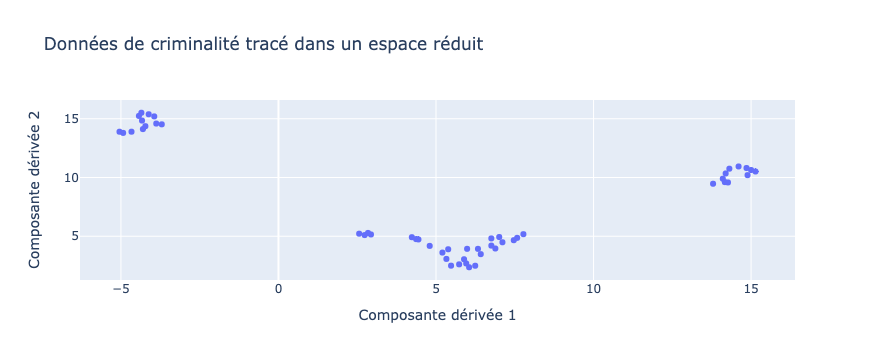

In [25]:
# Représentation graphique des données transformées

px.scatter(transformed_df, x=0, y=1,
           labels={'0':'Composante dérivée 1', '1': 'Composante dérivée 2'},
           hover_name=median_values.index, # On lie chaque point de donnée à son état
           title='Données de criminalité tracé dans un espace réduit')

Vous êtes censés obtenir une figure similaire à la suivante. Il est possible que votre résultat soit différent si votre version d'UMAP diffère de la 0.3.10 en raison du caractère stochastique de l'algorithme (difficile de garantir un résultat identique entre plusieurs exécutions).

<img src='plots/umap_prevu.png'>

Les données fixes ont été assez nettement séparées en **3 (éventuellement 4) groupes**.

Afin d'essayer de comprendre comment UMAP a résumé l'information, nous colorons le graphe précédent selon le taux médian de criminalité (tout type de crime confondu) par état.

In [26]:
# On récupère d'abord la somme de tous les types de criminalité pour chaque point des données initiales
sum_crime = df[['state', 'violent_crime_total', 'property_crime_total']].copy()
sum_crime['crime_total'] = sum_crime.violent_crime_total + sum_crime.property_crime_total
sum_crime.head()

,state,violent_crime_total,property_crime_total,crime_total
Year,,,,
1960-01-01,Alabama,186.6,1035.4,1222.0
1961-01-01,Alabama,168.5,985.5,1154.0
1962-01-01,Alabama,157.3,1067.0,1224.3
1963-01-01,Alabama,182.7,1150.9,1333.6
1964-01-01,Alabama,213.1,1358.7,1571.8


In [27]:
# Taux médian de criminalité par état, toute année et tout type de crimes confondus
median_crime = sum_crime.groupby('state').agg({'crime_total': 'median'})
median_crime.head()

,crime_total
state,
Alabama,4230.5
Alaska,4359.6
Arizona,6147.3
Arkansas,3924.7
California,5721.1


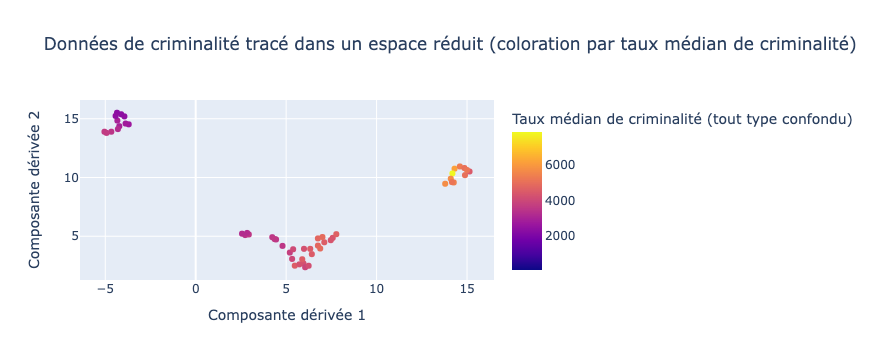

In [28]:
# On reproduit le graphe précédent avec une coloration par taux médian
# Pour assurer que l'échelle de couleur ne soit pas écrasée par quelques état, on décide de placer son point
# central (midpoint) au taux médian de criminalité (tout état et toute année confondu)
px.scatter(transformed_df, x=0, y=1,
           labels={'0':'Composante dérivée 1', '1': 'Composante dérivée 2', 
                   'color': 'Taux médian de criminalité (tout type confondu)'},
           hover_name=median_values.index,
           color=median_crime.crime_total,
           color_continuous_midpoint=sum_crime.crime_total.median(),
           title='Données de criminalité tracé dans un espace réduit (coloration par taux médian de criminalité)')

On observe donc que dans cet espace transformé, les états sont **regroupés par niveau médian de criminalité**. Le groupe de gauche correspond donc à des états faiblement criminels, ceux en bas à droite à des états avec davantage de criminalité.

#### Etape 2 : application de la distance optimisée à l'ensemble des données (avec `Year`)

La première application de UMAP (avec l'objet `reducer`) ci-dessus a permis d'apprendre une distance optimisée pour répartir les états selon leur niveau de criminalité. Cette distance a été apprise sur des données simplifiées, obtenues après agrégation. 

Nous pouvons **réutiliser cette distance** pour cette fois-ci réduire la dimensionnalité de l'ensemble de lignes du jeu original, i.e. pour tous les états et toutes les années. Pour ce faire, il suffit de réutiliser le même objet `reducer`.

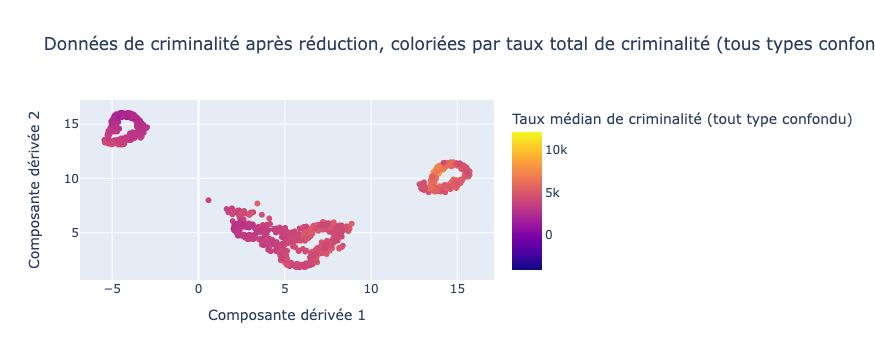

In [29]:
transformed_df_full = reducer.transform(df[['murder', 'rape', 
                                            'robbery', 'assault', 'burglary',
                                            'theft', 'car_theft']])
transformed_df_full = pd.DataFrame(transformed_df_full)

# Représentation graphique, colorié par la variable 'violent_crime_total' + 'property_crime_total'
px.scatter(transformed_df_full,
           x=0,
           y=1,
           color=df.violent_crime_total + df.property_crime_total,
           color_continuous_midpoint= (df.violent_crime_total + df.property_crime_total).median(),
           title = 'Données de criminalité après réduction, coloriées par taux total de criminalité (tous types confondus)',
           labels = {
               '0':'Composante dérivée 1', 
               '1': 'Composante dérivée 2', 
               'color': 'Taux médian de criminalité (tout type confondu)'
           })

----

## Exploration des données

Nous cherchons ici à trouver des représentations efficaces pour mieux comprendre les données. Cette tâche se révèle assez complexe en raison du **grand nombre de dimensions à représenter**. Néanmoins, quelques types de visualisations sont aptes à gérer ces nombreuses dimensions.

### Etude de l'évolution du crime au niveau *national*

Une première méthode simple est de **sacrifier une variable qualitative**. Ici, il est assez logique de ne pas considérer les statistiques au niveau de chaque état mais au niveau du pays entier.

Nous pouvons alors tracer l'évolution de chaque type de crime au niveau national. On choisit pour commencer de ne tracer que `violent_crime_total` et `property_crime_total` afin de simplifier le graphe.

Afin de quand même pouvoir afficher les variations *par état*, on représente l'écart-type de la série nationale agrégée. Cet écart-type nous donne une information sur la **dispersion** des données parmi les différents états.

Pour faire conformer les données au format *tidy data* et simplifier le tracé, nous transformons notre jeu de données pour obtenir une variable qualitative indiquant le type de criminalité (`property crime` ou `violent crime`) et une seconde colonne contenant la valeur correspondante. Pour chaque année et chaque type de criminalité, l'écart type est calculé.

In [30]:
df.head()

,population,violent_crime_total,murder,robbery,assault,property_crime_total,burglary,theft,car_theft,state,rape
Year,,,,,,,,,,,
1960-01-01,3266740,186.6,12.4,27.5,138.1,1035.4,355.9,592.1,87.3,Alabama,8.6
1961-01-01,3302000,168.5,12.9,19.1,128.9,985.5,339.3,569.4,76.8,Alabama,7.6
1962-01-01,3358000,157.3,9.4,22.5,119.0,1067.0,349.1,634.5,83.4,Alabama,6.5
1963-01-01,3347000,182.7,10.2,24.7,142.1,1150.9,376.9,683.4,90.6,Alabama,5.7
1964-01-01,3407000,213.1,9.3,29.1,163.0,1358.7,466.6,784.1,108.0,Alabama,11.7


In [31]:
# Création d'une variable qualitative indiquant le type de criminalité à l'aide de melt
# N'hésitez pas à décomposer cette cellule en plusieurs étapes pour mieux comprendre les transformations
tidy_df =(df
          .reset_index()
          .melt(id_vars='Year',
                value_vars=['violent_crime_total', 'property_crime_total'],
                var_name='crime_type',
                value_name='crime_rate')
          .groupby(['Year', 'crime_type']).agg(std_value=('crime_rate', 'std'),
                                               mean_value=('crime_rate', 'mean'))
          .reset_index()
         )

tidy_df.head()

,Year,crime_type,std_value,mean_value
0,1960-01-01,property_crime_total,640.111698,1604.480
1,1960-01-01,violent_crime_total,96.830484,114.866
2,1961-01-01,property_crime_total,639.513519,1616.770
3,1961-01-01,violent_crime_total,98.134897,112.890
4,1962-01-01,property_crime_total,643.426162,1691.376


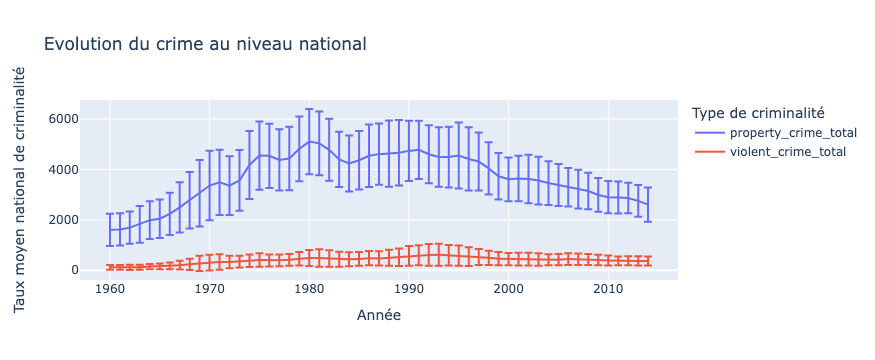

In [32]:
# Traçons ces données nationales
# Pour représenter l'écart type par année, nous utilisons les barres d'erreurs
# Nous pourrions également utiliser des diagrammes à aire, mais leur superposition est légèrement plus
# délicate

px.line(tidy_df,
        x='Year',
        y='mean_value',
        line_group='crime_type', # Une ligne tracé par type de criminalité
        color='crime_type',
        error_y='std_value',
        labels={'Year': 'Année',
               'mean_value': 'Taux moyen national de criminalité',
               'crime_type': 'Type de criminalité'},
        title='Evolution du crime au niveau national')

Quelques observations pêle-mêle :
* les **crimes violents** sont (heureusement) 4 à **5 fois moins fréquents que les délits**
* la criminalité a connu un **pic dans les années 80**. Les délits sont en **constante baisse depuis 1990**, les crimes violents se maintiennent
* les différences de taux entre les états (la "largeur" de chaque série) tendent à diminuer de nos jours, on peut donc imaginer que la criminalité est mieux contenue sur l'ensemble des territoires


On peut également envisager une représentation alternative où le temps n'apparaît plus directement sur un axe principal. On choisit par exemple de représenter le taux de crimes en fonction du taux de délits.

In [33]:
plot_no_time = (df
                .groupby(df.index)['property_crime_total', 'violent_crime_total']
                .mean()
                .reset_index())

plot_no_time.Year = plot_no_time['Year'].dt.year # ne garder que le chiffre de l'année
plot_no_time.head()

/var/folders/md/p4njr1bx1d58hlp7y5l2k21w0000gn/T/ipykernel_44278/294594342.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,property_crime_total,violent_crime_total
0,1960,1604.480,114.866
1,1961,1616.770,112.890
2,1962,1691.376,114.552
3,1963,1823.070,120.882
4,1964,1986.070,147.242


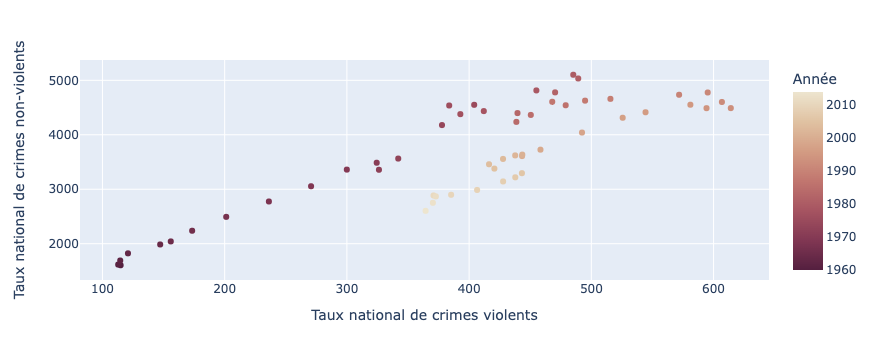

In [34]:
px.scatter(plot_no_time,
           y='property_crime_total',
           x='violent_crime_total',
           color='Year',
           hover_name='Year',
           labels= {'property_crime_total': 'Taux national de crimes non-violents',
                    'violent_crime_total': 'Taux national de crimes violents',
                    'Year': 'Année'},
           color_continuous_scale='Brwnyl_r') # On sélectionne une échelle de couleurs moins criardes

On constate à nouveau que la criminalité était historiquement basse au début des enregistrements (1960), puis augmente sans interruption jusqu'en 1980 avant de baisser depuis.

On observe mieux sur ce graphe que cette baisse de criminalité s'est déroulée en deux temps :
* De 1980 à 1994 : légère baisse des crimes non-violents mais augmentation des crimes violents
* De 1994 à aujourd'hui : baisse des crimes violents et non-violents

L'écart entre les états n'est pas lisible sur ce graphe. On pourrait envisager faire varier la taille de chaque point de donnée par la valeur de l'écart type pour cette année.

### Utilisation de grilles de traçage (`facets`)

Il est toutefois intéressant de se plonger dans le détail de la criminalité état par état. Nous avons ici 51 modalités à représenter (50 états + District of Columbia). Une grille de traçage est donc quasiment obligatoire afin de rendre le graphe final digeste. Etant donné le grand nombre de graphes à tracer, il est également fortement conseillé de **simplifier au maximum chaque graphe**. Un grand nombre de graphes chargés est pénible et difficile à lire.

En règle générale, le but d'une grille de traçage est avant tout de comparer les différences d'allures plus que de s'intéresser aux valeurs brutes. On peut donc **enlever l'axe des ordonnées**. On réduit également l'axe des abscisses à son plus simple élément : **une fine ligne**. Enfin, on ne tracera qu'**une** (éventuellement deux au maximum) **variable quantitative à la fois**.

Ne pas hésiter enfin à utiliser à bon escient la couleur afin d'aider à la lecture.

Ce type de graphe forme ainsi un [ridge plot](https://seaborn.pydata.org/examples/kde_ridgeplot) que l'on n'essaiera pas de tracer avec plotly par gain de temps. Son tracé est en effet assez pénible, et d'autres bibliothèques seraient peut-être plus appropriées.

Traçons pour commencer l'évolution des crimes violents uniquement, état par état.

### Heatmap

Les *heatmap* peuvent être vues comme des versions simplifiées de grilles de traçage. Seule une variable quantitative peut être représentée, mais une *heatmap* est en général compacte et rapidement lisible (l'oeil humain est efficace pour repérer des motifs de couleurs).

Nous traçons à nouveau l'évolution de la criminalité totale (`violent_crime_total` + `property_crime_total`) pour chaque état.

In [35]:
# La fonction heatmap de plotly attend en entrée des données rectangulaires.
# Il nous faut donc une ligne par année et une colonne par état (ou vice-versa)
# Nous pivotons les données initiales pour obtenir rapidement la bonne forme de données


heatmap_df = df.copy()
heatmap_df['total_crime'] = heatmap_df.violent_crime_total + heatmap_df.property_crime_total

heatmap_df = heatmap_df.pivot_table(index='state', # 1 état par ligne 
                            columns=heatmap_df.index.year, # 1 année par colonne 
                            values='total_crime') # On ne conserve que les données sur les crimes

heatmap_df.head()

Year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1222.0,1154.0,1224.3,1333.6,1571.8,1592.5,1758.3,1851.0,1999.0,2126.6,...,4333.0,4366.2,4426.6,4537.3,4230.5,3911.7,4025.2,3955.8,3778.9,3605.0
Alaska,1649.2,1629.5,1656.1,2062.5,2166.0,2603.5,2785.7,2884.6,3321.0,3880.2,...,4247.0,4266.1,4040.5,3579.4,3573.8,3472.1,3247.9,3347.7,3515.7,3395.8
Arizona,3013.7,3133.9,3201.1,3394.6,3645.3,3547.8,4135.8,4838.0,4874.4,5224.6,...,5339.0,5316.7,5050.6,4587.8,4015.5,3950.1,3968.9,3965.4,3781.0,3597.4
Arkansas,1034.1,1037.6,1089.7,1180.9,1359.2,1274.2,1382.8,1628.4,1958.5,2188.6,...,4596.0,4538.2,4492.6,4378.0,4290.8,4057.0,4240.2,4177.9,4061.9,3818.1
California,3474.4,3410.2,3561.0,3787.0,4139.9,4319.4,4549.4,5055.1,5721.1,6099.7,...,3847.0,3715.2,3567.6,3445.2,3204.3,3069.5,2995.4,3185.3,3053.8,2837.2


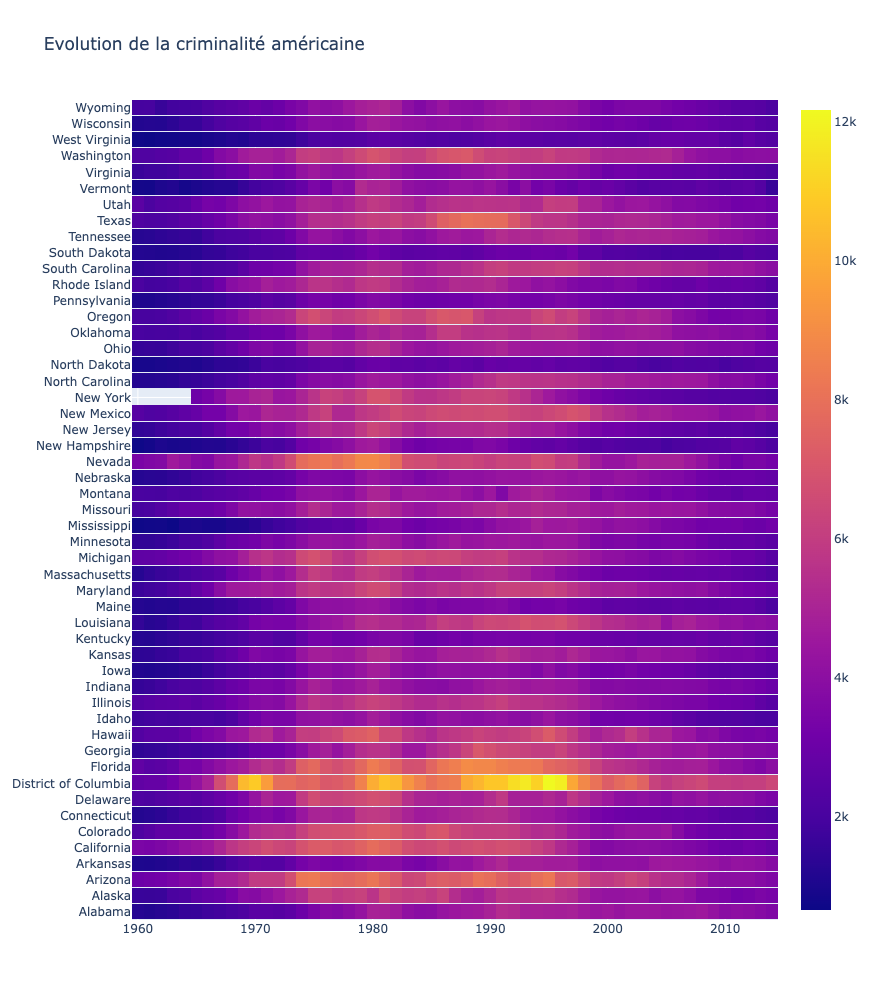

In [36]:
# Tracé
import plotly.graph_objects as go

go.Figure(data=go.Heatmap(z=heatmap_df, 
                          x=heatmap_df.columns, 
                          y=heatmap_df.index, 
                          ygap=1),
          layout={'height': 1000,
                  'title': 'Evolution de la criminalité américaine',
                  'coloraxis_colorbar_title_text': 'test'
                 })

Ces représentations plus détaillées mettent en évidence plusieurs catégories d'états :
* Ceux ayant connu un pic de crimes violents dans les années 80-90, en baisse depuis (New York, Nevada, Washington, Arizona, Connecticut). La plupart des états sont dans cette catégorie
* Ceux dont le taux de crimes violents est resté constant depuis la fin des années 80 (Alabama)
* Ceux dont le taux de crimes violents est resté à peu près constant et bas (North Dakota, South Dakota, West Virgina)

Essayons de retrouver automatiquement ces catégories avec une classification non supervisée (*clustering*).

---

## Classification des états

On se fixe comme objectif de classer les états selon différentes classes de criminalité. On espère ainsi pouvoir automatiquement **repérer les états plutôt violents et ceux plutôt calmes**.

Cette classification se fait sur l'ensemble des points de données, et est donc également **dépendante du temps**. On espère donc également voir après classification si un état a **tendance à devenir de plus en plus violent** ou au contraire paisible.

Nous effectuons cette classification avec la librairie **HDBSCAN** vue en cours. Le fonctionnement en détail de l'algorithme sous-jacent est très bien expliqué dans [la documentation officielle](https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html) et mérite une bonne lecture.

Cet algorithme accepte deux paramètres majeurs mais simples à définir *a priori* :
* `min_cluster_size` : nombre minimum de points de données dans chaque cluster. Les cluster plus petits sont fusionnés ou éliminés
* `min_samples` : détermine la sélectivité du cluster. Si `min_samples` est petit, les clusters peuvent être assez étalés, si `min_samples` est grand, HDBSCAN ne gardera que les clusters possédant une grande densité de points.

Le paramètre le plus important est `min_cluster_size`. Il est ensuite souvent nécessaire de tester plusieurs valeurs différentes pour `min_samples` afin d'obtenir des résultats qualitatifs.

##### Remarque importante
HDBSCAN ne permet **pas** de définir le nombre final de clusters car ce paramètre est en pratique délicat à fixer pour la plupart des jeux de données.

Pensez au jeu de données étudié ici : combien de profils de criminalité pensez-vous trouver ? 3 ? 4 ? En l'absence d'un avis d'expert ou d'une connaissance approfondie des données il est **rare de connaître le nombre de classes à trouver en amont de l'analyse**.

##### Données à classifier

Un essai de classification sur les données brutes (avant transformation par UMAP) donne des résultats peu pertinents (vérifiez par vous-même !). Nous appliquerons donc cette étape de **classification sur les données transformées**.

Le bien-fondé de cette approche est **discutable**, en effet HDBSCAN identifie les groupes comme des ensembles de points avec une densité élevée, mais UMAP ne préserve pas la densité des points (uniquement les plus proches voisins). En d'autre terme il est possible de trouver des **groupes créés artificiellement** par UMAP et n'existant pas dans les données brutes. Nous ferons donc attention à **vérifier** que **les groupes identifiés** ont bien un sens par rapport aux données brutes.

Pour plus d'informations sur l'impact d'une réduction de dimensions avant une classification, vous pouvez vous référer à [cette question](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne) et [cette page](https://umap-learn.readthedocs.io/en/latest/clustering.html) de la documentation d'UMAP. 

##### Représentation graphique

Nous explorerons **plusieurs méthodes graphiques** pour d'une part vérifier les groupes identifiés, et d'autre part exploiter les résultats de la classification.

Installer HDBSCAN
```sh
conda install -c conda-forge hdbscan
```

In [37]:
import hdbscan
import numpy as np

# On crée notre objet assurant la classification
# A nouveau, les paramètres choisis sont issus d'une recherche manuelle
# Le dernier paramètre ("cluster_selection_method") permet d'obtenir des clusters plus nombreux mais plus denses
# Il convient bien au problème
clusterer = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=50, cluster_selection_method='leaf')

In [38]:
# Calcul des clusters sur les données transformées par UMAP
clusterer.fit(transformed_df_full)

# Chaque élément est désormais associé à un cluster, numéroté de 0 à n
# Le cluster -1 correspond aux points bruités, non associés à un véritable cluster
clusterer.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
# Chaque élément possède également un "outlier score", qui mesure la certitude qu'il appartienne bien à son groupe
# Un score de 0 indique que HDBSCAN n'a aucun doute
clusterer.outlier_scores_

array([0.        , 0.2622017 , 0.11790385, ..., 0.59580941, 0.48972628,
       0.09494627])

In [40]:
# Calculons quelques métriques intéressantes pour commencer

print(len(np.unique(clusterer.labels_)) - 1, 'groupes détectés') # -1 pour retirer le "cluster" de bruit

classified_ratio = len(clusterer.labels_[clusterer.labels_ != -1]) / len(transformed_df_full)
print(f'{classified_ratio:.2%} des lignes classées dans un groupe')

5 groupes détectés
92.14% des lignes classées dans un groupe


HDBSCAN a donc trouvé **3 groupes** au sein des données transformées. La majeure partie des données a également été affectée à un véritable groupe. 

Nous traçeons ces groupes d'une part sur les données transformées (pour vérifier que les groupes soient justifiés) et d'autre part sur les données brutes (pour vérifier que les groupes fassent sens sur les "vraies" données).

Effectuons cette double vérification avec un simple nuage de point pour commencer.

In [41]:
# Vérification des groupes sur les données transformées

# clusterer.labels_ est un array numpy peu facilement manipulable
# On crée plutôt un DataFrame avec les données transformées et le groupe correspondant à chaque ligne
transformed_df_with_labels = transformed_df_full.copy()
transformed_df_with_labels['label'] = clusterer.labels_
transformed_df_with_labels['outlier_score'] = clusterer.outlier_scores_
transformed_df_with_labels.label = transformed_df_with_labels.label.astype('category')

transformed_df_with_labels.head()

,0,1,label,outlier_score
0,-4.737311,15.481227,0,0.000000
1,-4.546991,15.660405,0,0.262202
2,-4.457159,15.864495,0,0.117904
3,-3.955002,15.857897,0,0.094946
4,-4.861837,15.392834,0,0.000000


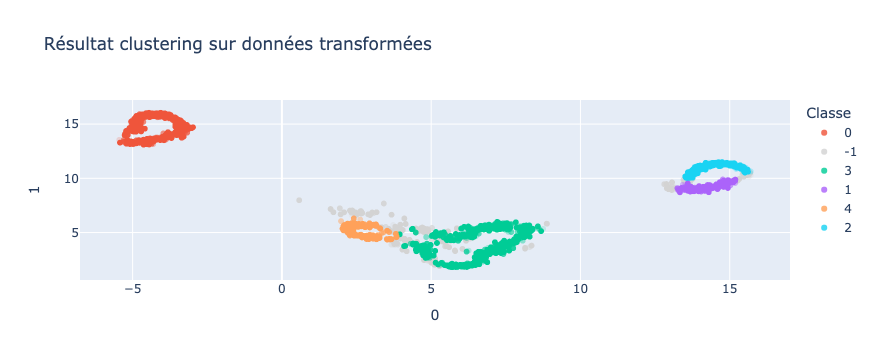

In [42]:
px.scatter(transformed_df_with_labels,
           x=0, 
           y=1,
           color='label', 
           title='Résultat clustering sur données transformées',
           opacity=1-transformed_df_with_labels.outlier_score,
           labels={'label': 'Classe'},
           color_discrete_map={-1: 'lightgray'}) # On colore en gris clair les points qui ne sont pas dans un cluster

* Le groupe évident en bas à gauche à correctement été classé en un seul et même groupe.
* Le grand amas de points à droite a été séparé en plusieurs clusters avec une logique débatable (cf. le long cluster de droite)
* Les quelques points éloignés du centre de chaque cluster sont frappés d'une grande incertitude (ils apparaissent davantage transparents). On pourrait décider de filtrer ces points en ne conservant que ceux au-dessus d'un palier arbitraire, nous ne le ferons pas ici. Notons que l'*outlier score* n'a de sens que pour une classe différente de -1.

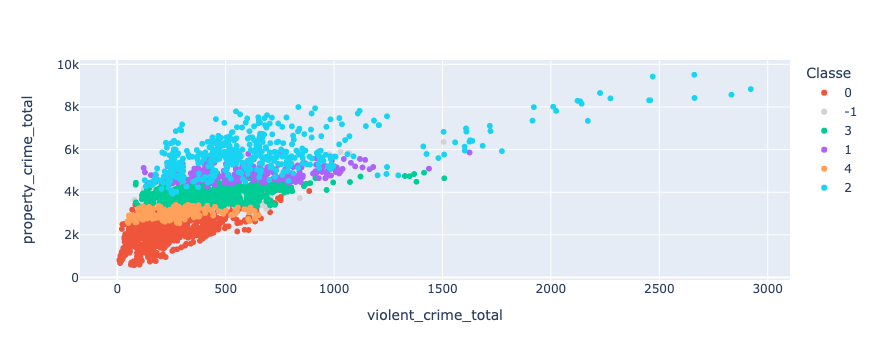

In [43]:
# Vérification des groupes sur les données brutes

# A nouveau, nous créons un DataFrame avec cette fois-ci les données brutes et une colonne "label"
df_with_groups = df.copy()
df_with_groups['label'] = clusterer.labels_
df_with_groups.label = df_with_groups.label.astype('category')

px.scatter(df_with_groups,
           x='violent_crime_total',
           y='property_crime_total',
           color='label',
           labels={'label': 'Classe'},
           color_discrete_map={-1: 'lightgray'})

On distingue approximativement sur ce graphe que les groupes correspondent bien à des tranches de criminalité. De façon assez pratique (et purement hasardeuse), le **numéro du groupe quantifie le niveau de criminalité** de l'état pour l'année concernée : les lignes du groupe 0 sont les moins criminelles, tandis que les lignes du groupes 2 sont les plus criminelles.

Le graphe ci-dessus ne permet toutefois pas de bien différencer la **position des frontières** entre les groupes en raison du grand nombre de points. Dans ces cas de figure, **tracer la densité de points** (et non les points eux-même) se révèle très efficace. Un graphe représente une densité selon deux variables (statistique bivariées) est dit **contour plot**.

Nous traçons ce graphe avec la même palette qu'au-dessus pour faciliter la comparaison. Nous ajoutons de surcroît les distributions marginales pour mieux comprendre l'impact de la classification.

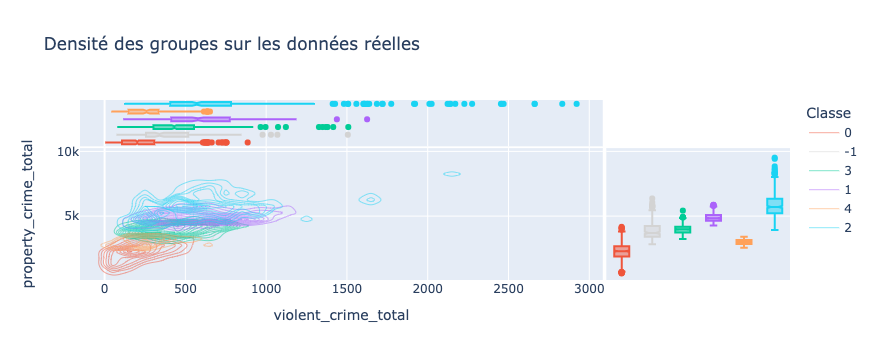

In [44]:
px.density_contour(df_with_groups,
                   x='violent_crime_total',
                   y='property_crime_total',
                   color='label',
                   labels={'label': 'Classe'},
                   color_discrete_map={-1: 'lightgrey'},
                   marginal_x='box',
                   marginal_y='box',
                   title='Densité des groupes sur les données réelles')

Ce graphe est bien plus lisible et affiche directement les frontières de chaque groupe. Il permet de confirmer que les groupes sont bien liés au niveau global de criminalité, mais en particulier au taux de `property_crime`. 

On constate de surcroît que les points classés comme bruit (en gris) sont principalement des points appartenant au groupe 1 (en vert) mais trop éloigné du centre du cluster. 

### Exploitation du clustering

Nous avons donc obtenu automatiquement une **classification du niveau de criminalité** qui permet de comparer facilement les états entre eux, année par année.

Commençons par étudier trois états vus ci-dessus dont le profil de criminalité est censé être radicalement différent :
* Connecticut : la criminalité connaît un pic dans les années 80 et baisse depuis le début du XXIe siècle
* West Virginia : la criminalité reste faible tout au long de la période étudiée
* Alabama : la criminalité connaît un pic dans les années 80, puis se maintient à un niveau plus faible depuis

Plutôt que d'étudier l'évolution de la criminalité directement, nous étudions l'**évolution du groupe attribué au fil du temps**. Nous savons en effet qu'un numéro élevé de cluster correspond à un taux important de criminalité et réciproquement, l'échelle est donc naturelle.

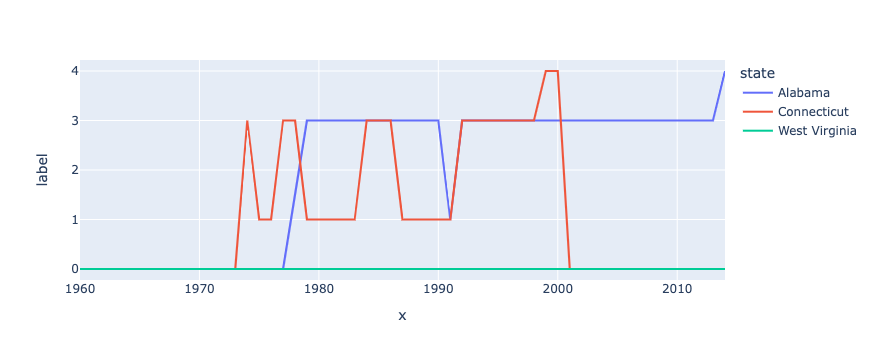

In [45]:
# Evolution pour quelques états bien choisis
selected_states = ['Connecticut', 'West Virginia', 'Alabama']
selected_states_df = df_with_groups[df_with_groups.state.isin(selected_states)].astype({'state': str})
selected_states_df = selected_states_df[selected_states_df.label != -1] # On enlève les années non classées

px.line(selected_states_df, x=selected_states_df.index.year,
        y='label',
        color='state')

L'étude du groupe attribué semble donc être un bon substitut pour remplacer l'étude des données brutes plus complexes. On retrouve bien la vague de criminalité du Connecticut dans les années 80, la relative tranquilité de la Virginie Occidentale et une criminalité qui ne faiblit pas depuis les années 80 en Alabama.

On peut donc décider d'estimer l'**évolution globale de la criminalité** dans l'ensemble des états en comptant année après année le nombre d'états situés dans chaque groupe. On se propose alors de tracer ces comptes selon un axe temps.

In [46]:
# Evolution globale de la criminalité, par année, en comptant le nombre d'état par groupe

counts = df_with_groups.groupby([df.index.year, 'label']).size().reset_index('label')
counts = counts.rename(columns={0: 'effectif'})
counts = counts[counts.label != -1] # Elimination des lignes bruitées

counts.head()

,label,effectif
Year,,
1960,0,50
1960,1,0
1960,2,0
1960,3,0
1960,4,0


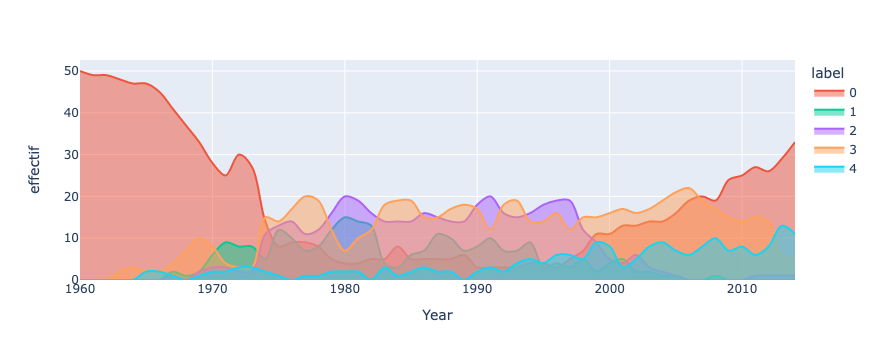

In [47]:
fig = px.area(counts, 
              x=counts.index, # Année
              y='effectif', 
              color='label', 
              color_discrete_map={-1: 'lightgray'},
              line_shape='spline') # Lissage des courbes

fig.update_traces(fill='tozeroy', stackgroup='') # On choisit de ne pas empiler les aires

Ce graphe général rejoint les observations établies lors de l'analyse exploratoire, à savoir :
* Un pic de criminalité a eu lieu au niveau national dans les années 80 et jusqu'au début des années 2000
* Bien qu'en baisse, la criminalité actuelle n'a pas retrouvé son niveau initial de 1960 (on l'observe à travers les effectifs des groupes 1 et 2 qui demeurent important de nos jours).

Pour cette analyse simple, le clustering n'apporte donc pas sensiblement d'informations nouvelles. Vous pouvez néanmoins essayer de déterminer davantage **la signification de chaque groupe** en étudiant plus précisément chaque type de criminalité (e.g. le groupe 2 est peut-être davantage lié aux vols de voitures que le groupe 3 ?).

En outre il est important de remarquer que **le groupe synthétise assez bien presque tout le tableau de données**. Pour une étude approfondie et en cas de fusion avec d'autres sources de données, vous pourrez donc manipuler uniquement ce numéro de groupe sans perdre trop d'informations. De plus, le modèle de classification (`clusterer`) est entraîné et fixe désormais. Vous pouvez donc l'appliquer à des taux de criminalités issus d'autres pays afin d'estimer leur position en matière de criminalité par rapport aux états américains.

On termine cette partie par le tracé d'une *heatmap* indiquant le numéro de groupe pour chaque état et chaque année.


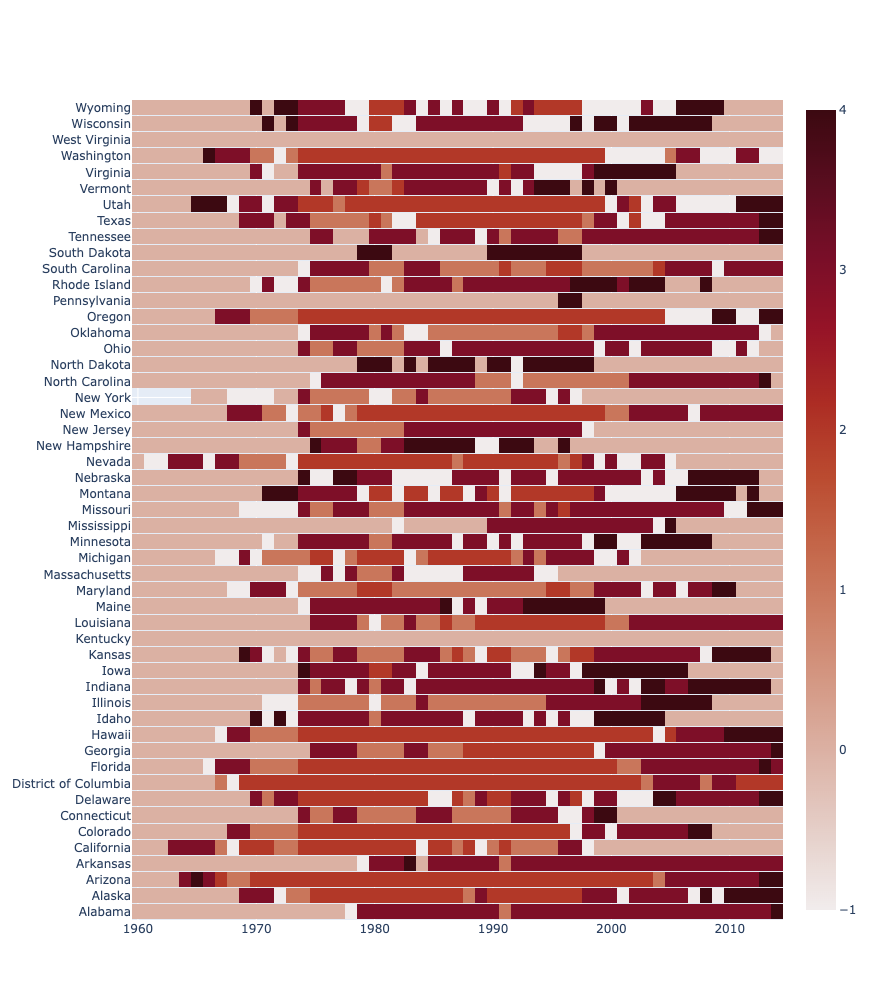

In [48]:
heatmap_df = df_with_groups.reset_index().pivot(index='state', columns='Year', values='label')

go.Figure(data=go.Heatmap(z=heatmap_df, 
                          x=heatmap_df.columns, 
                          y=heatmap_df.index, 
                          ygap=1, 
                          colorscale='amp'),
          layout={'height': 1000})

----

## Modélisation prévisionnelle de la criminalité

Nous nous proposons dans cette dernière partie d'essayer de déterminer un modèle prévisionnel de la criminalité. L'idée est donc ici de trouver les différentes variables permettant au mieux de **prédire la criminalité future** avec l'**erreur la plus faible**.

Nous utilisons ici la librairie [Prophet](https://facebook.github.io/prophet/) qui reprend le même modèle génératif que celui expliqué dans le cours. Le but de cette librairie est de permettre à des non-statisticiens de concevoir des **modèles prévisionnels décents** relativement simplement.

### Modèle simplifié

Commençons par concevoir un modèle simplifié, en utilisant uniquement les **paramètres par défaut** pour l'instant. Nous choississons pour toute cette partie de modéliser le **taux national moyen de crimes** (`violent_crime_total`).

Prophet attend en entrée un DataFrame avec au minimum deux colonnes : 
* `ds` (datestamp) : l'axe temporel de la série de donnée
* `y` : la mesure à prédire

Dans le cadre d'un modèle de **tendance logistique**, nous devons également ajouter deux colonnes :
* `cap` : la valeur maximale (saturation) que peut atteindre `y` pour la ligne courante
* `floor` : (Optionnel) la valeur minimale que peut atteindre `y` pour la ligne courante

Ces deux saturations sont déclarées lignes par lignes, elles peuvent donc être variables dans le temps. Dans notre cas, nous étudions de taux de crimes pour 100k habitants. La **saturation minimum est assez logiquement 0**, et on décide de fixer arbitrairement la **saturation maximum à 1000**. Cette dernière valeur est choisie comme étant supérieure au pic historique et par simple estimation des données. Il paraît en effet peu probable d'avoir plus de 1% de crimes violents dans un état développé.

Enfin Prophet s'accomode très bien de données manquantes ou de "trous" dans les données. Il n'y a pas de transformations particulières à faire dans ce cas.

In [49]:
# Création d'un DataFrame avec les bonnes colonnes

mean_crime = df.groupby('Year').violent_crime_total.mean()
mean_crime = mean_crime.reset_index().rename(columns={'Year': 'ds',
                                                      'violent_crime_total': 'y'})

mean_crime['cap'] = 1000
mean_crime['floor'] = 0
mean_crime.head()

,ds,y,cap,floor
0,1960-01-01,114.866,1000,0
1,1961-01-01,112.890,1000,0
2,1962-01-01,114.552,1000,0
3,1963-01-01,120.882,1000,0
4,1964-01-01,147.242,1000,0


Installer Prophet depuis conda
```sh
conda install -c conda-forge prophet
```

In [50]:
# Prophet utilise la libraire matplotlib pour tracer ses graphes
# Inutile de savoir l'utiliser, mais il faut toutefois la charger

%matplotlib notebook
import matplotlib.pyplot as plt

from prophet import Prophet

# Création du modèle
simple_model = Prophet(growth='logistic') # Modèle logistique de tendance

# Ajustement du modèle à nos données (calcul automatique du θ*)
# Quelques avertissements vont apparaître, vous pouvez les ignorer
simple_model.fit(mean_crime)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -67.9044
Iteration  1. Log joint probability =    30.6355. Improved by 98.5399.
Iteration  2. Log joint probability =    56.2184. Improved by 25.5829.
Iteration  3. Log joint probability =    67.5401. Improved by 11.3217.
Iteration  4. Log joint probability =    69.0339. Improved by 1.49374.
Iteration  5. Log joint probability =    69.2818. Improved by 0.247922.
Iteration  6. Log joint probability =    73.5583. Improved by 4.27651.
Iteration  7. Log joint probability =    76.6975. Improved by 3.13915.
Iteration  8. Log joint probability =    81.6791. Improved by 4.9816.
Iteration  9. Log joint probability =    85.4944. Improved by 3.8153.
Iteration 10. Log joint probability =    93.6007. Improved by 8.10634.
Iteration 11. Log joint probability =    93.6794. Improved by 0.0786649.
Iteration 12. Log joint probability =    93.7615. Improved by 0.0821231.
Iteration 13. Log joint probability =    93.8115. Improved by 0.0499741.
Iteration 14. Log joint probabi

Ce premier modèle maintenant ajusté, nous pouvons le décomposer pour observer l'impact de chaque composante (tendance, saisonnalité, etc...).

Pour ce faire, nous appliquons le modèle sur les données historiques. Nous projetons également le modèle dans le futur (prévisions). 

Là encore, il est nécessaire de préciser les colonnes `cap` et `floor` pour les données passées et futures.

In [51]:
# Préparation d'un DataFrame pour la prédiction. Toutes les données historiques + 15 années dans le futur
future = simple_model.make_future_dataframe(periods=15, freq='Y')
future['floor'] = 0
future['cap'] = 1000

future.head()

,ds,floor,cap
0,1960-01-01,0,1000
1,1961-01-01,0,1000
2,1962-01-01,0,1000
3,1963-01-01,0,1000
4,1964-01-01,0,1000


In [52]:
# Prédiction
simple_forecast = simple_model.predict(future)

simple_forecast.head()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1960-01-01,557.921297,1000,0,-39.904768,121.252771,557.921297,557.921297,-519.086825,-519.086825,-519.086825,-519.086825,-519.086825,-519.086825,0.0,0.0,0.0,38.834473
1,1961-01-01,591.517469,1000,0,-5.204454,144.936348,591.517469,591.517469,-523.255125,-523.255125,-523.255125,-523.255125,-523.255125,-523.255125,0.0,0.0,0.0,68.262344
2,1962-01-01,624.191717,1000,0,18.291536,180.283426,624.191717,624.191717,-522.451892,-522.451892,-522.451892,-522.451892,-522.451892,-522.451892,0.0,0.0,0.0,101.739825
3,1963-01-01,655.773323,1000,0,59.665003,217.891403,655.773323,655.773323,-521.061872,-521.061872,-521.061872,-521.061872,-521.061872,-521.061872,0.0,0.0,0.0,134.711450
4,1964-01-01,686.035869,1000,0,82.911094,247.200667,686.035869,686.035869,-519.086825,-519.086825,-519.086825,-519.086825,-519.086825,-519.086825,0.0,0.0,0.0,166.949044


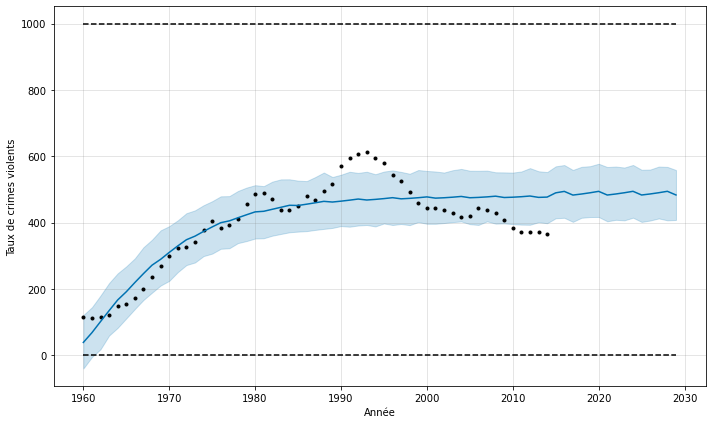

In [53]:
# Tracé des prédictions
%matplotlib inline
plt.close() # Fermeture de la figure précédente pour en tracer une nouvelle
fig = simple_model.plot(simple_forecast, ylabel='Taux de crimes violents', xlabel='Année')


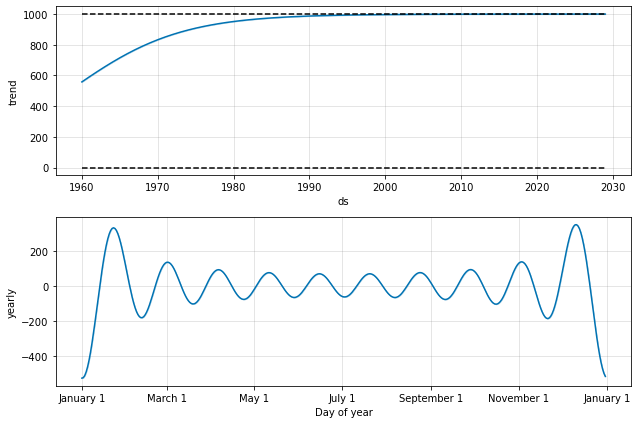

In [54]:
# Affichage des composantes
plt.close()
fig = simple_model.plot_components(simple_forecast)

Ce premier modèle n'est pas vraiment une grande réussite. La tendance par exemple est très mal captée, et modélisée par une augmentation continue qui ne reflète pas le pic des années 1980.

Plusieurs raisons peuvent être invoquées : la série étudiée n'est pas une série "business", elle est étalée sur de nombreuses années, pas de saisonnalité évidente, etc...

Nous pouvons toutefois essayer d'évaluer objectivement les performances du modèle avec des prévisions historiques simulées (SHF, aussi appelées validation croisée).

In [55]:
from prophet.diagnostics import cross_validation, performance_metrics

# Calcul de prévisions historiques simulées, avec un horizon temporel maximal de 10 ans
df_cv = cross_validation(simple_model, horizon='10Y')

simple_perf_metrics = performance_metrics(df_cv, metrics=['mape']) # Calcul de métriques d'évaluation (MAPE ici)

simple_perf_metrics.head()

/var/folders/md/p4njr1bx1d58hlp7y5l2k21w0000gn/T/ipykernel_44278/686895833.py:4: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

INFO:prophet:Making 3 forecasts with cutoffs between 1994-01-01 03:36:00 and 2004-01-01 13:48:00
  0%|          | 0/3 [00:00<?, ?it/s]


Initial log joint probability = -46.6665
Iteration  1. Log joint probability =    40.2515. Improved by 86.918.
Iteration  2. Log joint probability =    52.8662. Improved by 12.6147.
Iteration  3. Log joint probability =    67.9611. Improved by 15.0949.
Iteration  4. Log joint probability =    77.1594. Improved by 9.19827.
Iteration  5. Log joint probability =    79.7759. Improved by 2.61655.
Iteration  6. Log joint probability =     83.877. Improved by 4.10112.
Iteration  7. Log joint probability =    83.9653. Improved by 0.0882489.
Iteration  8. Log joint probability =    84.0132. Improved by 0.0479099.
Iteration  9. Log joint probability =    84.2141. Improved by 0.200904.
Iteration 10. Log joint probability =    84.3203. Improved by 0.106205.
Iteration 11. Log joint probability =    84.4372. Improved by 0.11694.
Iteration 12. Log joint probability =    84.6607. Improved by 0.223462.
Iteration 13. Log joint probability =    84.6937. Improved by 0.0329427.
Iteration 14. Log joint pro

 33%|███▎      | 1/3 [00:02<00:04,  2.29s/it]


Initial log joint probability = -52.2063
Iteration  1. Log joint probability =     30.685. Improved by 82.8913.
Iteration  2. Log joint probability =    51.7322. Improved by 21.0472.
Iteration  3. Log joint probability =     66.138. Improved by 14.4059.
Iteration  4. Log joint probability =    70.1322. Improved by 3.99416.
Iteration  5. Log joint probability =    77.5362. Improved by 7.40405.
Iteration  6. Log joint probability =     84.423. Improved by 6.8867.
Iteration  7. Log joint probability =    87.6954. Improved by 3.27245.
Iteration  8. Log joint probability =    87.9413. Improved by 0.245886.
Iteration  9. Log joint probability =    89.2305. Improved by 1.28922.
Iteration 10. Log joint probability =    89.2976. Improved by 0.0670621.
Iteration 11. Log joint probability =    89.3628. Improved by 0.0652119.
Iteration 12. Log joint probability =    89.4806. Improved by 0.117829.
Iteration 13. Log joint probability =    89.5005. Improved by 0.0198788.
Iteration 14. Log joint prob

 67%|██████▋   | 2/3 [00:04<00:02,  2.32s/it]


Initial log joint probability = -57.5158
Iteration  1. Log joint probability =    26.4388. Improved by 83.9546.
Iteration  2. Log joint probability =    54.2545. Improved by 27.8157.
Iteration  3. Log joint probability =    61.4715. Improved by 7.21703.
Iteration  4. Log joint probability =    63.3612. Improved by 1.88969.
Iteration  5. Log joint probability =    64.1044. Improved by 0.743139.
Iteration  6. Log joint probability =    64.1138. Improved by 0.00949182.
Iteration  7. Log joint probability =    68.8425. Improved by 4.72862.
Iteration  8. Log joint probability =    68.8941. Improved by 0.0516531.
Iteration  9. Log joint probability =    69.0626. Improved by 0.168518.
Iteration 10. Log joint probability =    69.1124. Improved by 0.0497453.
Iteration 11. Log joint probability =    69.2026. Improved by 0.0902435.
Iteration 12. Log joint probability =    69.2082. Improved by 0.00555708.
Iteration 13. Log joint probability =    69.2603. Improved by 0.0521093.
Iteration 14. Log j

100%|██████████| 3/3 [00:07<00:00,  2.34s/it]


,horizon,mape
0,364 days 20:24:00,0.140261
1,365 days 10:12:00,0.128212
2,729 days 20:24:00,0.167971
3,730 days 10:12:00,0.133618
4,730 days 15:18:00,0.227132


Traçons désormais l'évolution de cette métrique selon la valeur de l'horizon de prédiction.

Prophet fournit une fonction pour ce tracé, mais le rendu n'est pas très efficace. Nous allons donc faire ce graphe manuellement.

In [56]:
# On arrondit le champ 'horizon' à l'année la plus proche
simple_perf_metrics.horizon = simple_perf_metrics.horizon.dt.round('365d')

# Conversion de "horizon" de jours en années
simple_perf_metrics.horizon = simple_perf_metrics.horizon.dt.days / 365

simple_perf_metrics.head()

,horizon,mape
0,1.0,0.140261
1,1.0,0.128212
2,2.0,0.167971
3,2.0,0.133618
4,2.0,0.227132


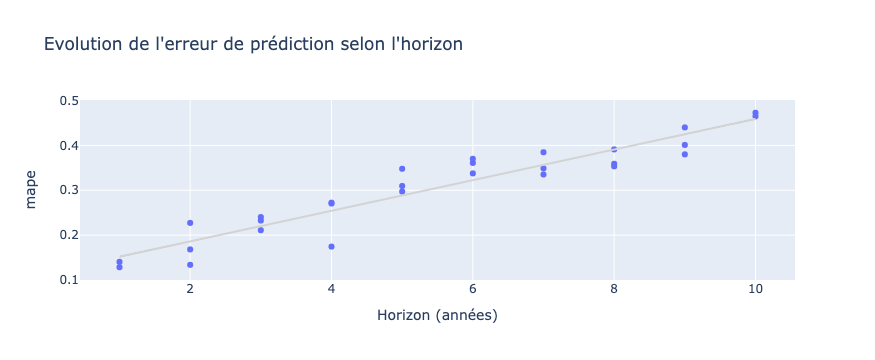

In [57]:
import plotly.express as px

px.scatter(simple_perf_metrics, 
           x='horizon', 
           y='mape', 
           trendline='ols', # Ajout d'une courbe de tendance
           trendline_color_override='lightgray', # ... en gris
           labels={'horizon': 'Horizon (années)'},
           title="Evolution de l'erreur de prédiction selon l'horizon") 

On observe assez logiquement que l'erreur relative moyenne (MAPE) augmente au fur et à mesure que l'horizon de prédiction augmente. En effet, il est généralement de plus en plus **difficile de prédire le futur lointain** que le futur proche.

Toutefois, mêmes les prédictions proches sont marquées par un grand taux d'erreur : presque 20% d'erreur pour un horizon de 2 ans ! Le modèle est donc tout simplement mauvais

### Modèle prévisionnel amélioré

Concevoir un bon modèle prévisionnel sans connaissance des données est **difficile**, voire impossible. Il convient donc de **se rapprocher d'un expert lors de la conception du modèle** pour repérer des variables susceptibles d'influencer l'évolution de la grandeur mesurée. Ces variables sont généralement dites "**features**", le processus permettant de chercher les bonnes "features" pour un modèle est le "*feature engineering*".

Dans notre cas, la criminalité et son évolution ont fait l'objet d'un très grand nombre d'études au fil du temps, nous pourrons donc nous appuyer dessus.

En ce qui concerne la criminalité du XXe siècle, un facteur souvent évoqué pour justifier de son évolution est l'**empoisonnement au plomb des populations**. En effet, du plomb était traditionnellement rajouté dans les carburants (jusqu'en 1996 pour les USA, 2000 pour l'Europe), l'augmentation du trafic routier au cours du XXe siècle a donc augmenté les émissions atmosphériques de plomb.

L'[impact physiologique du plomb](https://fr.wikipedia.org/wiki/Saturnisme) est bien étudié, et il a été montré qu'une exposition renforcée au plomb lors de l'enfance augmente l'irritabilité des individus et leur propension à être violent.

La théorie ici étudiée (dite [Lead Crime Hypothesis](https://en.wikipedia.org/wiki/Lead%E2%80%93crime_hypothesis)) lie donc l'évolution des émissions de plomb et celle des crimes violents.

Une étude souvent citée [1] appuyant cette théorie avance que la criminalité est fortement corrélée avec l'exposition au plomb décalée de 23 ans. Autrement dit, les statistiques de la criminalité de 1970 sont partiellement fonction de l'exposition au plomb en 1947. Cet écart est justifié par **l'impact du plomb au cours de la croissance**. Une forte exposition au plomb impactera davantage les enfants qui seront plus à même de commettre des crimes une fois adultes.

L'exposition au plomb est mesurée dans le fichier `blood_lead_level_usa.csv`. Ce fichier indique l'évolution de la  concentration sanguine du plomb (en µg/dL de sang) pour les populations jeunes (`preschool`) et pour tout âge (`all_ages`). Ce fichier est extrait de la figure 2 de [1].

[1] **Nevin, R.** (2007). Understanding international crime trends: the legacy of preschool lead exposure. *Environmental research*, 104(3), 315-336.

In [58]:
# Lecture des niveaux sanguins de plomb
# Ce fichier a déjà été nettoyé pour éviter de perdre du temps, il est prêt à étre exploité
lead_levels = pd.read_csv('blood_lead_levels_usa.csv', index_col=0, parse_dates=True)

lead_levels.head()

,preschool_levels,all_ages_levels
1936-01-01,4.737609,3.862974
1937-01-01,4.737609,4.081633
1938-01-01,4.956268,4.227405
1939-01-01,5.247813,4.373178
1940-01-01,5.466472,4.591837


In [59]:
lead_levels.preschool_levels.tshift(23, freq='YS')

/var/folders/md/p4njr1bx1d58hlp7y5l2k21w0000gn/T/ipykernel_44278/3990181300.py:1: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



1959-01-01    4.737609
1960-01-01    4.737609
1961-01-01    4.956268
1962-01-01    5.247813
1963-01-01    5.466472
                ...   
2019-01-01    2.332362
2020-01-01    2.332362
2021-01-01    2.332362
2022-01-01    2.186589
2023-01-01    2.113703
Name: preschool_levels, Length: 65, dtype: float64

/var/folders/md/p4njr1bx1d58hlp7y5l2k21w0000gn/T/ipykernel_44278/3844317268.py:12: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.

/var/folders/md/p4njr1bx1d58hlp7y5l2k21w0000gn/T/ipykernel_44278/3844317268.py:13: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



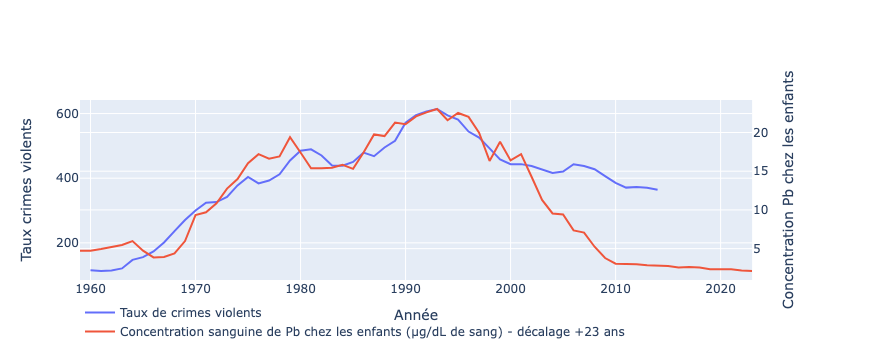

In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Création d'une figure avec deux axes Y
fig = make_subplots(specs=[[{"secondary_y": True}]])

tmp = df.groupby('Year').violent_crime_total.mean().reset_index()
fig.add_trace(go.Scatter(x=tmp.Year, 
                         y=tmp.violent_crime_total,
                         name='Taux de crimes violents'))

fig.add_trace(go.Scatter(y=lead_levels.preschool_levels.tshift(23, freq='YS'),
                         x=lead_levels.preschool_levels.tshift(23, freq='YS').index,
                         name = 'Concentration sanguine de Pb chez les enfants (µg/dL de sang) - décalage +23 ans'),
              secondary_y=True)

fig.update_layout(legend_orientation='h', # Légende en bas de la figure
                  yaxis_title_text='Taux crimes violents',
                  yaxis2_title_text = 'Concentration Pb chez les enfants',
                  xaxis_title_text = 'Année') 
fig.show()

La corrélation entre les deux variables semble justifiée à première vue. Nous intégrons donc cette nouvelle série de données (`lead_levels.preschool_levels`) comme **variable explicative supplémentaire** du modèle prévisionnel.

In [61]:
# Création du DataFrame de données historiques avec la concentration sanguine

mean_crimes_with_lead = df.groupby('Year').violent_crime_total.median().to_frame() # to_frame : Series → DataFrame

# Ajout de la nouvelle variable dans une colonne supplémentaire
mean_crimes_with_lead['lagged_lead_level'] = lead_levels.preschool_levels.tshift(23, freq='YS')

mean_crimes_with_lead = mean_crimes_with_lead.reset_index().rename(columns={'Year': 'ds',
                                                                            'violent_crime_total': 'y'})

mean_crimes_with_lead['cap'] = 1000
mean_crimes_with_lead['floor'] = 0

mean_crimes_with_lead.head()

/var/folders/md/p4njr1bx1d58hlp7y5l2k21w0000gn/T/ipykernel_44278/3671393295.py:6: FutureWarning:

tshift is deprecated and will be removed in a future version. Please use shift instead.



,ds,y,lagged_lead_level,cap,floor
0,1960-01-01,97.15,4.737609,1000,0
1,1961-01-01,91.70,4.956268,1000,0
2,1962-01-01,91.45,5.247813,1000,0
3,1963-01-01,97.15,5.466472,1000,0
4,1964-01-01,121.10,5.976676,1000,0


On crée désormais un deuxième modèle Prophet qui tient compte de cette variable. **Nous apportons quelques modifications supplémentaires.**

Puisque l'on s'intéresse au rôle joué par les émissions de plomb sur la criminalité, on décide de **placer manuellement les points d'inflexions de la tendance** (*changepoints*) pour les faire correspondre aux années où des paliers majeurs pour l'interdiction des carburants au plomb ont été atteints.

Ces années sont issues de la frise chronologique de [ce rapport](http://web.mit.edu/ckolstad/www/Newell.pdf).

Nous **supprimons également l'impact de la saisonnalité**. Cette série de donnée n'est visiblement pas saisonnière, inutile donc de perturber le modèle à essayer d'apprendre une saisonnalité.

Ensuite nous changeons légèrement **l'étalement des distributions *a priori* (*priors*)** des paramètres à inférer. Ces étalements quantifie en réalité à quel point le modèle va "coller" au données. Un étalement élevé indique au modèle qu'il peut se rapprocher au maximum de chaque point de donnée (quitte à modéliser également du bruit), un étalement faible indique que le modèle peut rester assez éloigné de chaque point de donnée.

Les valeurs indiquées ci-dessous (paramètres `prior_scale` et `changepoint_prior_scale`) ont été obtenues manuellement et fonctionnent assez bien. Vous êtes invités à les modifier dans un second temps puis à retracer les courbes pour évaluer leur impact sur le modèle.

Enfin nous calculons automatiquement un **intervalle de crédibilité à 80%** pour tous les composants du modèle.

In [62]:
# Définition du modèle amélioré
model = Prophet(growth='logistic',
                changepoints=['1974', '1979', '1982', '1983', '1985', '1986', '1988', '1996'], # points d'inflexion
                changepoint_prior_scale=.5,
                yearly_seasonality=False, # ne pas apprendre de saisonnalité annuelle
                weekly_seasonality=True,
                daily_seasonality=True,
                mcmc_samples=2000,# échantillonner la distribution a posteriori pour calculer l'intervalle de crédibilité
                interval_width=0.8) # Intervalle de crédibilité à 80%

model.add_regressor('lagged_lead_level', prior_scale=0.5) # On rajoute le nouveau régresseur

# Cette commande peut mettre quelques minutes à s'exécuter
model.fit(mean_crimes_with_lead)

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.





Gradient evaluation took 0.000207 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.07 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.000208 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.08 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000151 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.51 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 0.000105 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.05 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [

On ne connaît pas la concentration sanguine infantile en plomb dans le futur. Deux possibilités s'offrent à nous :
* Faire (ou trouver quelque part) un deuxième modèle prévisionnel uniquement pour cette mesure, puis utiliser les valeurs prédites dans le modèle prévisionnel de la criminalité
* Evaluer le modèle uniquement sur les données historiques dans un premier temps : on choisit ce cas de figure le plus simple

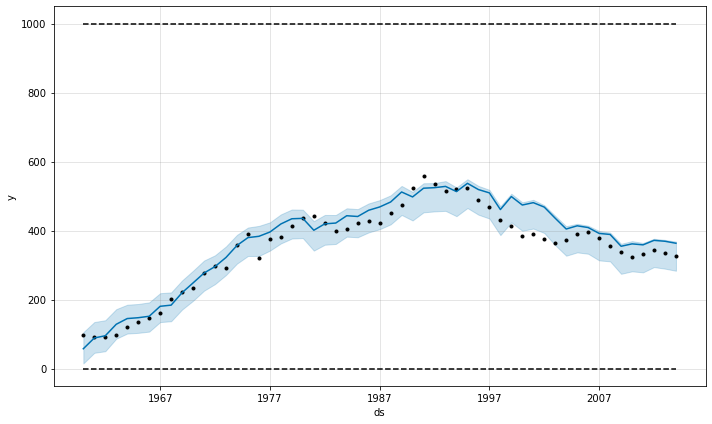

In [63]:
historical_forecast = model.predict(mean_crimes_with_lead)

plt.close()
fig = model.plot(historical_forecast)

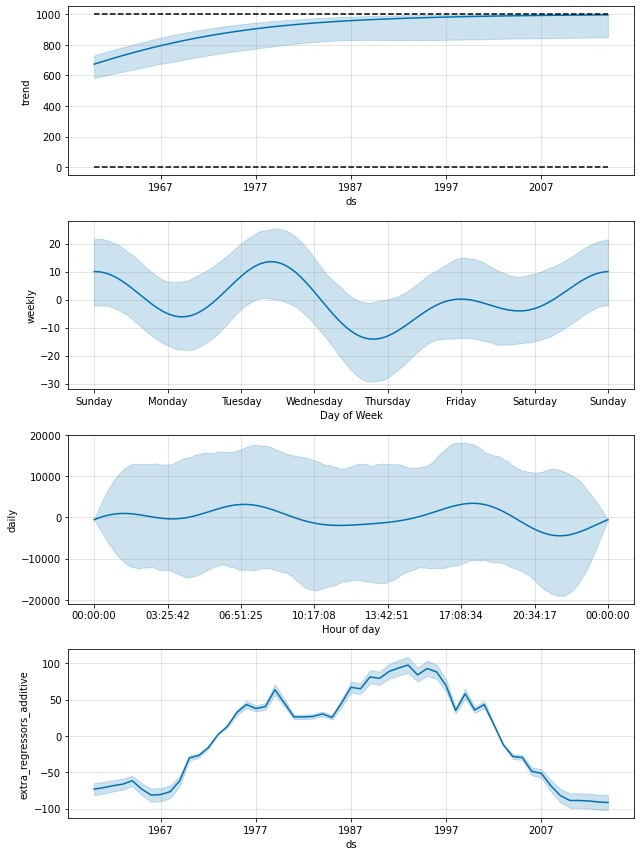

In [64]:
# Tracé des composantes
plt.close()
fig = model.plot_components(historical_forecast)

Le modèle paraît déjà de bien meilleure qualité. On observe notamment que le taux moyen de criminalité est en majeure partie piloté (ou en tout cas corrélé) avec l'exposition infantile au plomb. En effet, la tendance (qui ne tient plus compte de l'effet du plomb désormais) est relativement constante depuis 1980, avec une bonne certitude (intervalle de crédibilité réduit).

En ce qui concerne l'impact du plomb, nous pouvons observer que le modèle peut s'appuyer dessus avec une grande certitude, notamment pour les phases de croissance marquée (1970) et de décroissance (2000, interdiction des carburants au plomb). Ceci se traduit ici aussi par un intervalle de crédibilité fin.

On constate enfin que l'impact du plomb tend à se stabiliser de nos jours. En effet, presqu'une génération entière d'enfants a grandi dans un environnement de moins en moins exposé au plomb. Il est probable que l'effet du plomb disparaissent donc presque entièrement dans le futur.

Vérifions la précision de ce nouveau modèle pour finir.

In [65]:
# Evaluation du modèle
# Cette cellule peut également mettre quelques minutes à s'exécuter

df_cv = cross_validation(model, horizon='10Y')

perf_metrics = performance_metrics(df_cv, metrics=['mape']) # Calcul de métriques d'évaluation (MAPE ici)

perf_metrics.horizon = perf_metrics.horizon.dt.round('365d')
perf_metrics.horizon = perf_metrics.horizon.dt.days / 365

perf_metrics.head()

/var/folders/md/p4njr1bx1d58hlp7y5l2k21w0000gn/T/ipykernel_44278/3619077388.py:4: FutureWarning:

Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version

INFO:prophet:Making 3 forecasts with cutoffs between 1994-01-01 03:36:00 and 2004-01-01 13:48:00
  0%|          | 0/3 [00:00<?, ?it/s]Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.




Gradient evaluation took 0.000115 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.15 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 9.6e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.96 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 9e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.9 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 9.1e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.91 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 20%] 

 33%|███▎      | 1/3 [01:09<02:19, 69.64s/it]Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.




Gradient evaluation took 0.000118 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000101 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.01 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)


Gradient evaluation took 0.00014 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.4 seconds.
Adjust your expectations accordingly!


Gradient evaluation took 0.000149 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.49 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [ 2

Iteration: 2000 / 2000 [100%]  (Sampling)

 Elapsed Time: 31.9561 seconds (Warm-up)
               36.4399 seconds (Sampling)
               68.396 seconds (Total)



 67%|██████▋   | 2/3 [02:24<01:12, 72.45s/it]Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.




Gradient evaluation took 0.000118 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 0.000217 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.17 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)

Gradient evaluation took 0.000109 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.09 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000112 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.12 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:    1 / 2000 [  0%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  200 / 2000 [ 10%]  (Warmup)
Iteration:  400 / 2000 [

100%|██████████| 3/3 [04:56<00:00, 98.87s/it] 


,horizon,mape
0,1.0,0.173226
1,1.0,0.064065
2,2.0,0.119954
3,2.0,0.143281
4,2.0,0.144518


In [66]:
# On fusionne ces métriques avec celles obtenues avec le modèle simple pour les comparer
all_perf_metrics = pd.concat([simple_perf_metrics, perf_metrics], axis=1)

# Renommage des colonnes pour mieux s'y retrouver
# Il existe deux colonnes "horizon" identiques après concaténation, on en supprime une copie
all_perf_metrics.columns = ['horizon', 'mape_modele_simple', 'horizon_repeated', 'mape_modele_complet']

all_perf_metrics = all_perf_metrics.drop(columns=['horizon_repeated'])

# Passage au format tidy pour simplifier le tracé
all_perf_metrics = pd.melt(all_perf_metrics, 
                           value_name='mape', 
                           var_name='modele',
                           value_vars=['mape_modele_simple', 'mape_modele_complet'], 
                           id_vars='horizon')

all_perf_metrics.head()

,horizon,modele,mape
0,1.0,mape_modele_simple,0.140261
1,1.0,mape_modele_simple,0.128212
2,2.0,mape_modele_simple,0.167971
3,2.0,mape_modele_simple,0.133618
4,2.0,mape_modele_simple,0.227132


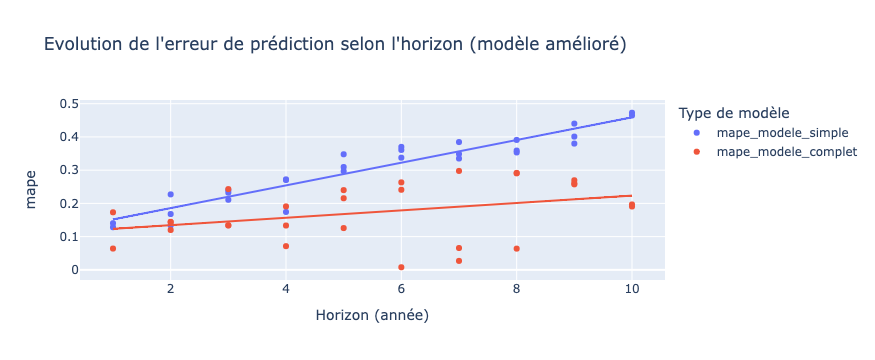

In [67]:
px.scatter(all_perf_metrics, 
                 x='horizon', 
                 y='mape',
                 color='modele',
                 trendline='ols',
                 title="Evolution de l'erreur de prédiction selon l'horizon (modèle amélioré)",
                 labels={'horizon': 'Horizon (année)',
                         'modele': 'Type de modèle'})

Notre modèle est donc bien meilleur que le précédent (en tout cas sur les données historiques). L'erreur moyenne relative est 20% plus faible pour tous les horizons de prédictions.

La présence du regresseur additionnel (concentration sanguine de plomb) et le positionnement manuel des points d'inflexion ont donc permis de mieux modéliser les données.

### Conclusions

Nous avons mis en évidence dans cette partie différentes techniques pour construire un modèle prévisionnel de bonne qualité. L'ajout d'une variable explicative supplémentaire, issue d'une expertise technique du domaine étudiée, améliore notamment grandement la précision du modèle.

Il est à noter que nous avons seulement montré un lien marqué de **corrélation** entre l'exposition infantile au plomb et le taux moyen de crimes violents aux USA, mais en aucun cas un lien de **causalité**.

Comme rappelé dans l'introduction, il est impossible d'établir un lien de causalité avec une étude simplement observationnelle (i.e. sans contrôler les populations étudiées). Néanmoins, des preuves supplémentaires viennent étayer la *Lead Crime Hypothesis* : 
* La même corrélation entre interdiction des carburants au plomb et baisse de la criminalité a été observée dans plusieurs pays distincts, indépendamment de la date d'interdiction
* Il existe un argument médical prouvé justifiant l'impact du plomb sur le comportement des individus
* Il existe une antériorité du phénomène (la diminution de la concentration sanguine en plomb précède la baisse de la criminalité)

Ceux désirant lire davantage à ce sujet peuvent consulter [cet article](https://cen.acs.org/articles/92/i5/Crimes-Lead.html) de l'*American Chemical Society* ainsi que les nombreuses sources listées. 

---